In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
import statsmodels as stm


In [2]:
sns.set_palette(sns.color_palette("icefire"))

import warnings
warnings.filterwarnings("ignore")

In [3]:
pd.options.display.max_rows=None
pd.options.display.max_columns=None

In [164]:
#import os
#os.chdir('/content/drive/My Drive/Colab Notebooks/Predictive Modelling/Group Assignment/')

In [4]:
zir_df=pd.read_csv('C:\\Users\\tatilak\\Desktop\\Data Science\\Predictive Modeling\\Group Assignment\\cubic_zirconia.csv')

**Assumptions of Linear Regression**
1. The independent variables should not be correlated.

2. Linear Regression means that the dependent variable should be linearly related with the coefficients.

3. The error terms has a constant variance i.e. they are homoscedastic in nature.

4. There should not be any auto-correlation between the error terms.

5. The errors are assumed to be normally distributed.**

In [5]:
zir_df.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [6]:
zir_df=zir_df.drop('Unnamed: 0',axis=1)

- Remove "Unnamed: 0" Variable this is just a identifier


In [7]:
zir_df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [8]:
zir_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


In [9]:
zir_df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

- There are 697 Null Values in Depth column

In [10]:
zir_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
carat,26967,NaN,NaN,NaN,0.798375,0.477745,0.2,0.4,0.7,1.05,4.5
cut,26967,5,Ideal,10816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,26967,7,G,5661,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,26967,8,SI1,6571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,26270,NaN,NaN,NaN,61.7451,1.41286,50.8,61,61.8,62.5,73.6
table,26967,NaN,NaN,NaN,57.4561,2.23207,49,56,57,59,79
x,26967,NaN,NaN,NaN,5.72985,1.12852,0,4.71,5.69,6.55,10.23
y,26967,NaN,NaN,NaN,5.73357,1.16606,0,4.71,5.71,6.54,58.9
z,26967,NaN,NaN,NaN,3.53806,0.720624,0,2.9,3.52,4.04,31.8
price,26967,NaN,NaN,NaN,3939.52,4024.86,326,945,2375,5360,18818


Try to impute null values in Depth Variable lator on

In [11]:
zir_df.describe()

,carat,depth,table,x,y,z,price
count,26967.000000,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,0.798375,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,0.477745,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


## Exploratory Data Analysis

#### Identifying the Null Value

In [12]:
zir_df.iloc[np.where(zir_df.depth.isnull())].head(10)

,carat,cut,color,clarity,depth,table,x,y,z,price
26,0.34,Ideal,D,SI1,NaN,57.0,4.50,4.44,2.74,803
86,0.74,Ideal,E,SI2,NaN,59.0,5.92,5.97,3.52,2501
117,1.00,Premium,F,SI1,NaN,59.0,6.40,6.36,4.00,5292
148,1.11,Premium,E,SI2,NaN,61.0,6.66,6.61,4.09,4177
163,1.00,Very Good,F,VS2,NaN,55.0,6.39,6.44,3.99,6340
185,0.43,Ideal,E,SI1,NaN,56.0,4.82,4.79,3.01,975
258,0.41,Ideal,I,IF,NaN,57.0,4.78,4.81,2.93,953
313,0.71,Premium,F,VS1,NaN,58.0,5.71,5.67,3.57,2879
344,0.51,Very Good,E,VS1,NaN,54.7,5.12,5.15,31.80,1970
367,0.29,Very Good,I,VS2,NaN,55.0,4.25,4.27,2.66,384


#### Fixing the Null Values by Removing Those from DataFrame

- There are 697 Null values, we can directly remove those records we have still sufficient observation to Learn the Model

In [13]:
zir_df=zir_df.dropna()

In [14]:
zir_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26270 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26270 non-null  float64
 1   cut      26270 non-null  object 
 2   color    26270 non-null  object 
 3   clarity  26270 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26270 non-null  float64
 6   x        26270 non-null  float64
 7   y        26270 non-null  float64
 8   z        26270 non-null  float64
 9   price    26270 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.2+ MB


#### Identifying the Number of Duplicate Rows

In [15]:
a=zir_df.duplicated()
a.sum()

34

- There are 34 duplicate Rows

#### Fetch the Duplicat Rows

In [16]:
print(zir_df[zir_df.duplicated(keep='last')].sort_values(['carat','cut','color']), "\n \n")
print(zir_df[zir_df.duplicated(keep='first')].sort_values(['carat','cut','color']))

       carat        cut color clarity  depth  table     x     y     z  price
8482    0.30       Good     J     VS1   63.4   57.0  4.23  4.26  2.69    394
7217    0.30      Ideal     G      IF   62.1   55.0  4.32  4.35  2.69    863
8900    0.30      Ideal     H     SI1   62.2   57.0  4.26  4.29  2.66    450
8305    0.32    Premium     H     VS2   60.6   58.0  4.47  4.44  2.70    648
18874   0.33      Ideal     F      IF   61.2   56.0  4.47  4.49  2.74   1240
7115    0.33      Ideal     G     VS1   62.1   55.0  4.46  4.43  2.76    854
2155    0.35      Ideal     F     VS2   61.4   54.0  4.58  4.54  2.80    906
423     0.35    Premium     J     VS1   62.4   58.0  5.67  5.64  3.53    949
9775    0.41      Ideal     G      IF   61.7   56.0  4.77  4.80  2.95   1367
12376   0.43      Ideal     G     VS1   61.9   55.0  4.84  4.86  3.00    943
14729   0.51    Premium     F     SI2   58.1   59.0  5.26  5.24  3.05   1052
10240   0.60    Premium     D     SI2   62.0   57.0  5.43  5.35  3.34   1196

#### Drop Duplicate Values

In [17]:
zir_df_final=zir_df.drop_duplicates()

#### Check the Null/Duplicate and Basis Stat for Data Frame

In [18]:
zir_df_final.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [19]:
zir_df_final.duplicated().sum()

0

In [20]:
zir_df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26236 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26236 non-null  float64
 1   cut      26236 non-null  object 
 2   color    26236 non-null  object 
 3   clarity  26236 non-null  object 
 4   depth    26236 non-null  float64
 5   table    26236 non-null  float64
 6   x        26236 non-null  float64
 7   y        26236 non-null  float64
 8   z        26236 non-null  float64
 9   price    26236 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.2+ MB


In [21]:
zir_df_final.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
carat,26236,NaN,NaN,NaN,0.79762,0.476691,0.2,0.4,0.7,1.05,4.5
cut,26236,5,Ideal,10535,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,26236,7,G,5521,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,26236,8,SI1,6402,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,26236,NaN,NaN,NaN,61.7453,1.41224,50.8,61,61.8,62.5,73.6
table,26236,NaN,NaN,NaN,57.4559,2.23087,49,56,57,59,79
x,26236,NaN,NaN,NaN,5.72865,1.12633,0,4.71,5.69,6.54,10.23
y,26236,NaN,NaN,NaN,5.73249,1.16528,0,4.72,5.7,6.54,58.9
z,26236,NaN,NaN,NaN,3.53634,0.698608,0,2.9,3.52,4.04,8.06
price,26236,NaN,NaN,NaN,3935.93,4019.81,326,945,2374,5356,18818


In [22]:
zir_df_final.describe(include='object').T

,count,unique,top,freq
cut,26236,5,Ideal,10535
color,26236,7,G,5521
clarity,26236,8,SI1,6402


## Lets do Univariate for Continous Variable

   <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea">  First let us check the distribution of the data.
    
 <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> What does the distribution of data tell us?

<font color=darkblue>
    
* The plot displayed below is called as a Histogram
    
* The X-axis groups the observations from minimum to maximum along the axis on the basis of the discrete points or class intervals

* The Y-axis measures the frequency of occurance of observations for each discrete point or class interval.

In [23]:
zir_df_final.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26236.0,0.797620,0.476691,0.2,0.40,0.70,1.05,4.50
depth,26236.0,61.745285,1.412243,50.8,61.00,61.80,62.50,73.60
table,26236.0,57.455877,2.230866,49.0,56.00,57.00,59.00,79.00
x,26236.0,5.728646,1.126332,0.0,4.71,5.69,6.54,10.23
y,26236.0,5.732487,1.165283,0.0,4.72,5.70,6.54,58.90
z,26236.0,3.536339,0.698608,0.0,2.90,3.52,4.04,8.06
price,26236.0,3935.926818,4019.809223,326.0,945.00,2374.00,5356.00,18818.00


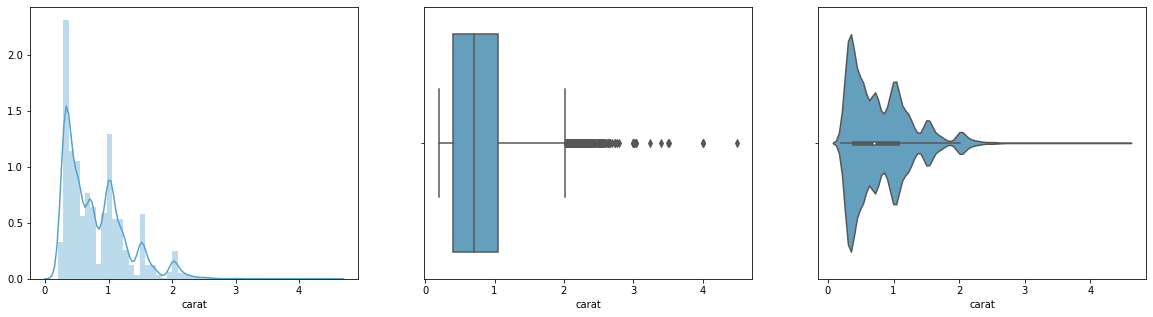

carat whisk =  2.0250000000000004
carat has 638 data points as Outlier on the upper side
carat whisk =  -0.5750000000000001
carat has 0 data points as Outlier on the lower side


In [24]:
  # Plots for Caret
fig_dims = (20, 5) 
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=fig_dims) 
sns.distplot(zir_df_final.carat, kde=True, ax=axs[0]) 
sns.boxplot(x= 'carat', data=zir_df_final, ax=axs[1])
sns.violinplot(zir_df_final.carat, ax= axs[2])
plt.show()

carat_whisk_high=zir_df_final.carat.quantile(0.75) + (1.5*(zir_df_final.carat.quantile(0.75) - zir_df_final.carat.quantile(0.25)))
print("carat whisk = ",carat_whisk_high)
print("carat has",zir_df_final[zir_df_final['carat'] > carat_whisk_high]['carat'].shape[0],"data points as Outlier on the upper side")

carat_whisk_low=zir_df_final.carat.quantile(0.25) - (1.5*(zir_df_final.carat.quantile(0.75) - zir_df_final.carat.quantile(0.25)))
print("carat whisk = ",carat_whisk_low)
print("carat has",zir_df_final[zir_df_final['carat'] < carat_whisk_low]['carat'].shape[0],"data points as Outlier on the lower side")

Observation
1. There are fluctuations in the data.
2. Distribution is Right Skewed 
3. Outliers are more on the higher side.
4. Multiple clusters can be seen in the data.

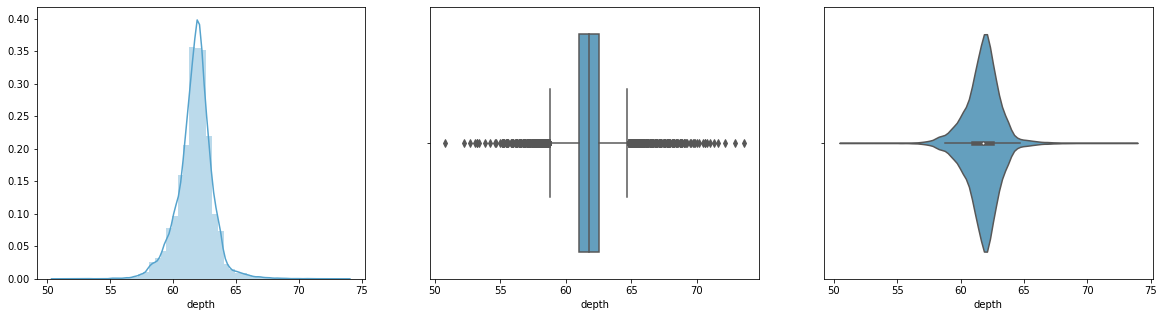

depth Higher whisk =  64.75
depth has 486 data points as Outlier on the upper side
depth Lower whisk =  58.75
depth has 733 data points as Outlier on the Lower side


In [25]:
# Plots for Score on depth
fig_dims = (20, 5) 
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=fig_dims) 
sns.distplot(zir_df_final.depth, kde=True, ax=axs[0]) 
sns.boxplot(x= 'depth', data=zir_df_final, ax=axs[1])
sns.violinplot(zir_df_final.depth, ax= axs[2]) 

plt.show()

depth_whisk_high=zir_df_final.depth.quantile(0.75) + (1.5*(zir_df_final.depth.quantile(0.75) - zir_df_final.depth.quantile(0.25)))
print("depth Higher whisk = ",depth_whisk_high)
print("depth has",zir_df_final[zir_df_final['depth'] > depth_whisk_high]['depth'].shape[0],"data points as Outlier on the upper side")

depth_whisk_low=zir_df_final.depth.quantile(0.25) - (1.5*(zir_df_final.depth.quantile(0.75) - zir_df_final.depth.quantile(0.25)))
print("depth Lower whisk = ",depth_whisk_low)
print("depth has",zir_df_final[zir_df_final['depth'] < depth_whisk_low]['depth'].shape[0],"data points as Outlier on the Lower side")

Observation
1. From the violin plot it can be seen that, most of the observations are in between 60 and 65
2. It seems from the above graph that the data distribution is almost normally distributed
3. Outliers can be seen on both the sides  of the Whisker


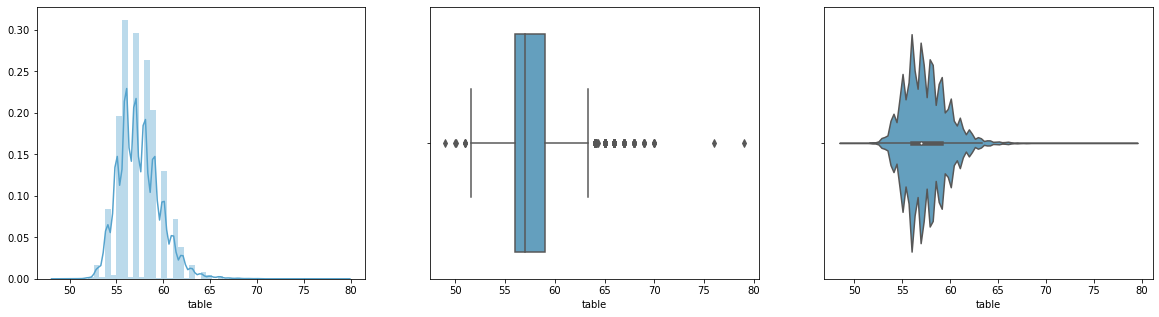

table Higher whisk =  63.5
table has 302 data points as Outlier on the upper side
table Lower whisk =  51.5
table has 7 data points as Outlier on the lower side


In [26]:
# Plots for table
fig_dims = (20, 5) 
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=fig_dims) 
sns.distplot(zir_df_final.table, kde=True, ax=axs[0]) 
sns.boxplot(x= 'table', data=zir_df_final, ax=axs[1])
sns.violinplot(zir_df_final.table, ax= axs[2])

plt.show()

table_whisk_high=zir_df_final.table.quantile(0.75) + (1.5*(zir_df_final.table.quantile(0.75) - zir_df_final.table.quantile(0.25)))
print("table Higher whisk = ",table_whisk_high)
print("table has",zir_df_final[zir_df_final['table'] > table_whisk_high]['table'].shape[0],"data points as Outlier on the upper side")


table_whisk_low=zir_df_final.table.quantile(0.25) - (1.5*(zir_df_final.table.quantile(0.75) - zir_df_final.table.quantile(0.25)))
print("table Lower whisk = ",table_whisk_low)
print("table has",zir_df_final[zir_df_final['table'] < table_whisk_low]['table'].shape[0],"data points as Outlier on the lower side")


Observation
1. Lots of Fluctuations in the data points.
2. Distribution is Right Skewed 
3. It seems Outliers are on the both sides of the whisker but more outliers on the higher side.


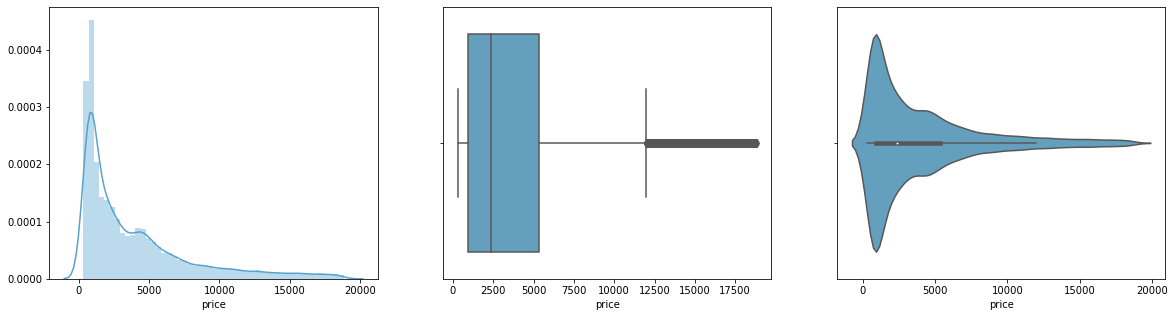

price Higher whisk =  11972.5
price has 1727 data points as Outlier on the upper side
price Lower whisk =  -5671.5
price has 0 data points as Outlier on the Lower side


In [27]:
# Plots for price
fig_dims = (20, 5) 
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=fig_dims) 
sns.distplot(zir_df_final.price, kde=True, ax=axs[0]) 
sns.boxplot(x= 'price', data=zir_df_final, ax=axs[1])
sns.violinplot(zir_df_final.price, ax= axs[2]) 
plt.show()

price_whisk_high=zir_df_final.price.quantile(0.75) + (1.5*(zir_df_final.price.quantile(0.75) - zir_df_final.price.quantile(0.25)))
print("price Higher whisk = ",price_whisk_high)
print("price has",zir_df_final[zir_df_final['price'] > price_whisk_high]['price'].shape[0],"data points as Outlier on the upper side")

price_whisk_low=zir_df_final.price.quantile(0.25) - (1.5*(zir_df_final.price.quantile(0.75) - zir_df_final.price.quantile(0.25)))
print("price Lower whisk = ",price_whisk_low)
print("price has",zir_df_final[zir_df_final['price'] < price_whisk_low]['price'].shape[0],"data points as Outlier on the Lower side")


Observation
1. From the violin plot it can be seen that, most of the observations are in between 0 and 10k
2. Distribution is Right Skewed 
3. Outliers are on the higher side

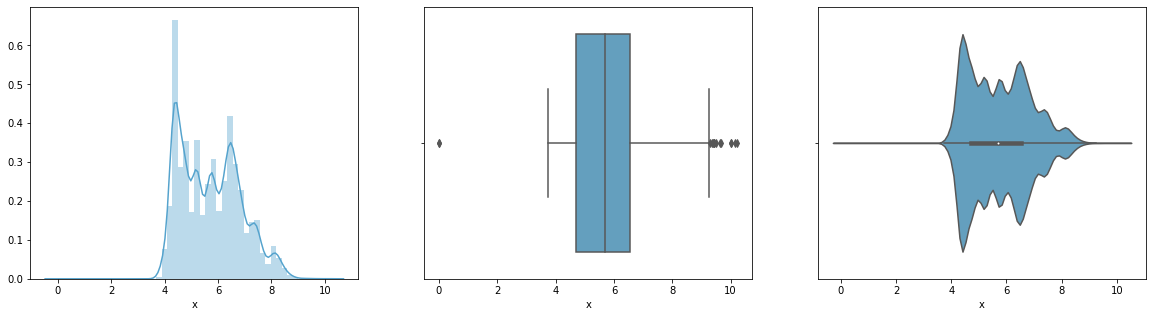

x Higher whisk =  9.285
x has 13 data points as Outlier on the upper side
x Lower whisk =  1.9649999999999999
x has 2 data points as Outlier on the Lower side


In [28]:
# Plots for x
fig_dims = (20, 5) 
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=fig_dims) 
sns.distplot(zir_df_final.x, kde=True, ax=axs[0]) 
sns.boxplot(x= 'x', data=zir_df_final, ax=axs[1])
sns.violinplot(zir_df_final.x, ax= axs[2])

plt.show()

x_whisk_high=zir_df_final.x.quantile(0.75) + (1.5*(zir_df_final.x.quantile(0.75) - zir_df_final.x.quantile(0.25)))
print("x Higher whisk = ",x_whisk_high)
print("x has",zir_df_final[zir_df_final['x'] > x_whisk_high]['x'].shape[0],"data points as Outlier on the upper side")

x_whisk_low=zir_df_final.x.quantile(0.25) - (1.5*(zir_df_final.x.quantile(0.75) - zir_df_final.x.quantile(0.25)))
print("x Lower whisk = ",x_whisk_low)
print("x has",zir_df_final[zir_df_final['x'] < x_whisk_low]['x'].shape[0],"data points as Outlier on the Lower side")

Observation
1. From the violin plot it can be seen that, most of the observations are in between 4 and 8
2. Distribution is Right Skewed 
3. Outliers are more on the higher side
4. Fluctuations in the data.

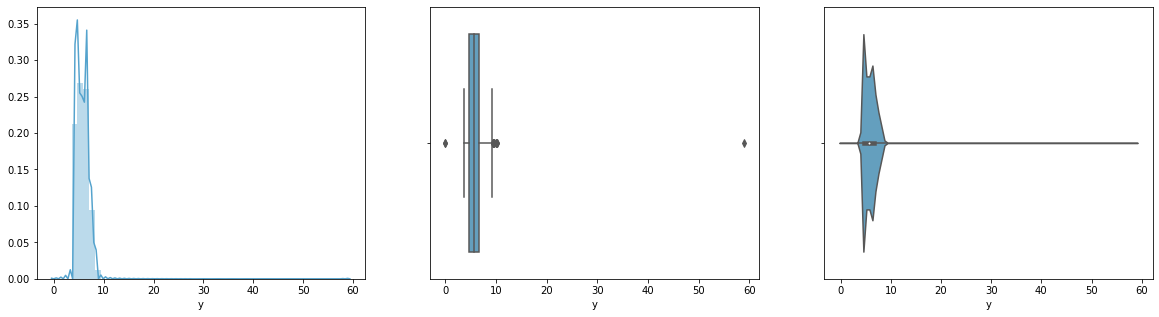

y Higher whisk =  9.27
y has 12 data points as Outlier on the upper side
y Lower whisk =  1.9899999999999993
y has 2 data points as Outlier on the Lower side


In [29]:
# Plots for y
fig_dims = (20, 5) 
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=fig_dims) 
sns.distplot(zir_df_final.y, kde=True, ax=axs[0]) 
sns.boxplot(x= 'y', data=zir_df_final, ax=axs[1])
sns.violinplot(zir_df_final.y, ax= axs[2])
  
plt.show()

y_whisk_high=zir_df_final.y.quantile(0.75) + (1.5*(zir_df_final.y.quantile(0.75) - zir_df_final.y.quantile(0.25)))
print("y Higher whisk = ",y_whisk_high)
print("y has",zir_df_final[zir_df_final['y'] > y_whisk_high]['y'].shape[0],"data points as Outlier on the upper side")

y_whisk_low=zir_df_final.y.quantile(0.25) - (1.5*(zir_df_final.y.quantile(0.75) - zir_df_final.y.quantile(0.25)))
print("y Lower whisk = ",y_whisk_low)
print("y has",zir_df_final[zir_df_final['y'] < y_whisk_low]['y'].shape[0],"data points as Outlier on the Lower side")

Observation
1. From the above graph it can be seen that the range for this variable is very low.
2. Distribution is Right Skewed 
3. It seems Outliers are on the both sides of the whisker but more outliers are on the higher side

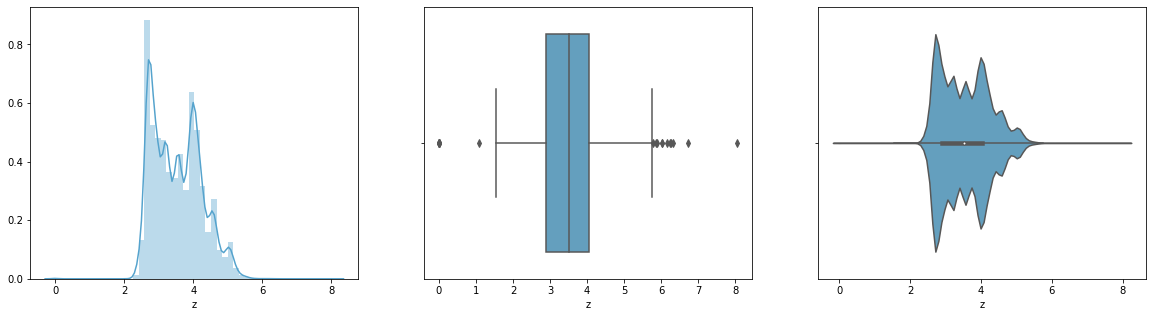

z Higher whisk =  5.75
z has 11 data points as Outlier on the upper side
z Lower whisk =  1.1899999999999997
z has 9 data points as Outlier on the Lower side


In [30]:
# Plots for z
fig_dims = (20, 5) 
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=fig_dims) 
sns.distplot(zir_df_final.z, kde=True, ax=axs[0]) 
sns.boxplot(x= 'z', data=zir_df_final, ax=axs[1])
sns.violinplot(zir_df_final.z, ax= axs[2])

plt.show()

z_whisk_high=zir_df_final.z.quantile(0.75) + (1.5*(zir_df_final.z.quantile(0.75) - zir_df_final.z.quantile(0.25)))
print("z Higher whisk = ",z_whisk_high)
print("z has",zir_df_final[zir_df_final['z'] > z_whisk_high]['z'].shape[0],"data points as Outlier on the upper side")

z_whisk_low=zir_df_final.z.quantile(0.25) - (1.5*(zir_df_final.z.quantile(0.75) - zir_df_final.z.quantile(0.25)))
print("z Lower whisk = ",z_whisk_low)
print("z has",zir_df_final[zir_df_final['z'] < z_whisk_low]['z'].shape[0],"data points as Outlier on the Lower side")

Observation
1. From the violin plot and box plot, it can be seen that, most of the observations are in between 3 and 4
2. Distribution is Right Skewed 
3. It seems Outliers are on the both sides of the whisker but more outliers are on the higher side


## Univariate Analysis Categorical Features

##### Define Function for univariate analysis of categorical variable

In [31]:
def univariateAnalysis_category(cat_column):
    print("Details of " + cat_column)
    print("----------------------------------------------------------------")
    print(zir_df_final[cat_column].value_counts(normalize=False))
    print('\n')
    print(zir_df_final[cat_column].value_counts(normalize=True))
    sns.countplot(x=cat_column, data=zir_df_final, palette='mako')
    plt.show()
    print("       ")

In [32]:
cat = ['cut', 'color', 'clarity']

Details of cut
----------------------------------------------------------------
Ideal        10535
Premium       6694
Very Good     5875
Good          2376
Fair           756
Name: cut, dtype: int64


Ideal        0.401547
Premium      0.255146
Very Good    0.223929
Good         0.090563
Fair         0.028815
Name: cut, dtype: float64


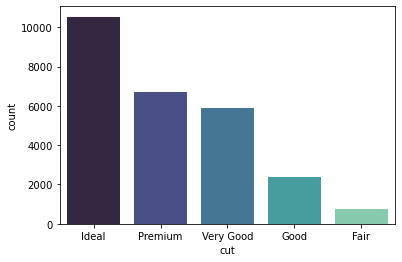

       
Details of color
----------------------------------------------------------------
G    5521
E    4792
F    4606
H    3984
D    3265
I    2670
J    1398
Name: color, dtype: int64


G    0.210436
E    0.182650
F    0.175560
H    0.151852
D    0.124447
I    0.101769
J    0.053286
Name: color, dtype: float64


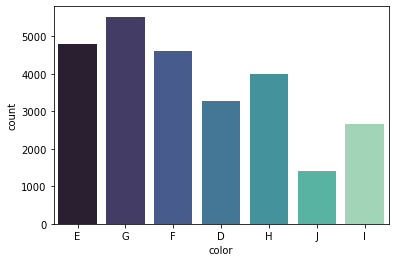

       
Details of clarity
----------------------------------------------------------------
SI1     6402
VS2     5919
SI2     4436
VS1     3985
VVS2    2478
VVS1    1791
IF       871
I1       354
Name: clarity, dtype: int64


SI1     0.244016
VS2     0.225606
SI2     0.169081
VS1     0.151891
VVS2    0.094450
VVS1    0.068265
IF      0.033199
I1      0.013493
Name: clarity, dtype: float64


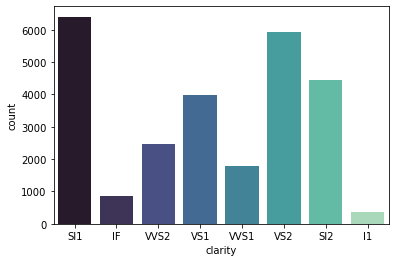

In [33]:
for x in cat:
    univariateAnalysis_category(x)

Observations
1. As per the above bar graph it seems Ideal has the highest data points in the data with 40% share.
2. 87% of the data is contributed by Idea, Premium and Very good diamond cut quality.
3. Color J has the lowest share amongst other colors. It seems that it belongs to the higher price of the section.
4. There are no manufacturing of Flawless and Worst clarity diamong present in the dataset.
5. THe manufacturer is manufacturing more no of diamonds with SL1 and VS2 clarity.

## Bivariate Analysis

### Numeric & Numeric

In [34]:
num = ['carat', 'depth', 'table', 'x', 'y', 'z', 'price']

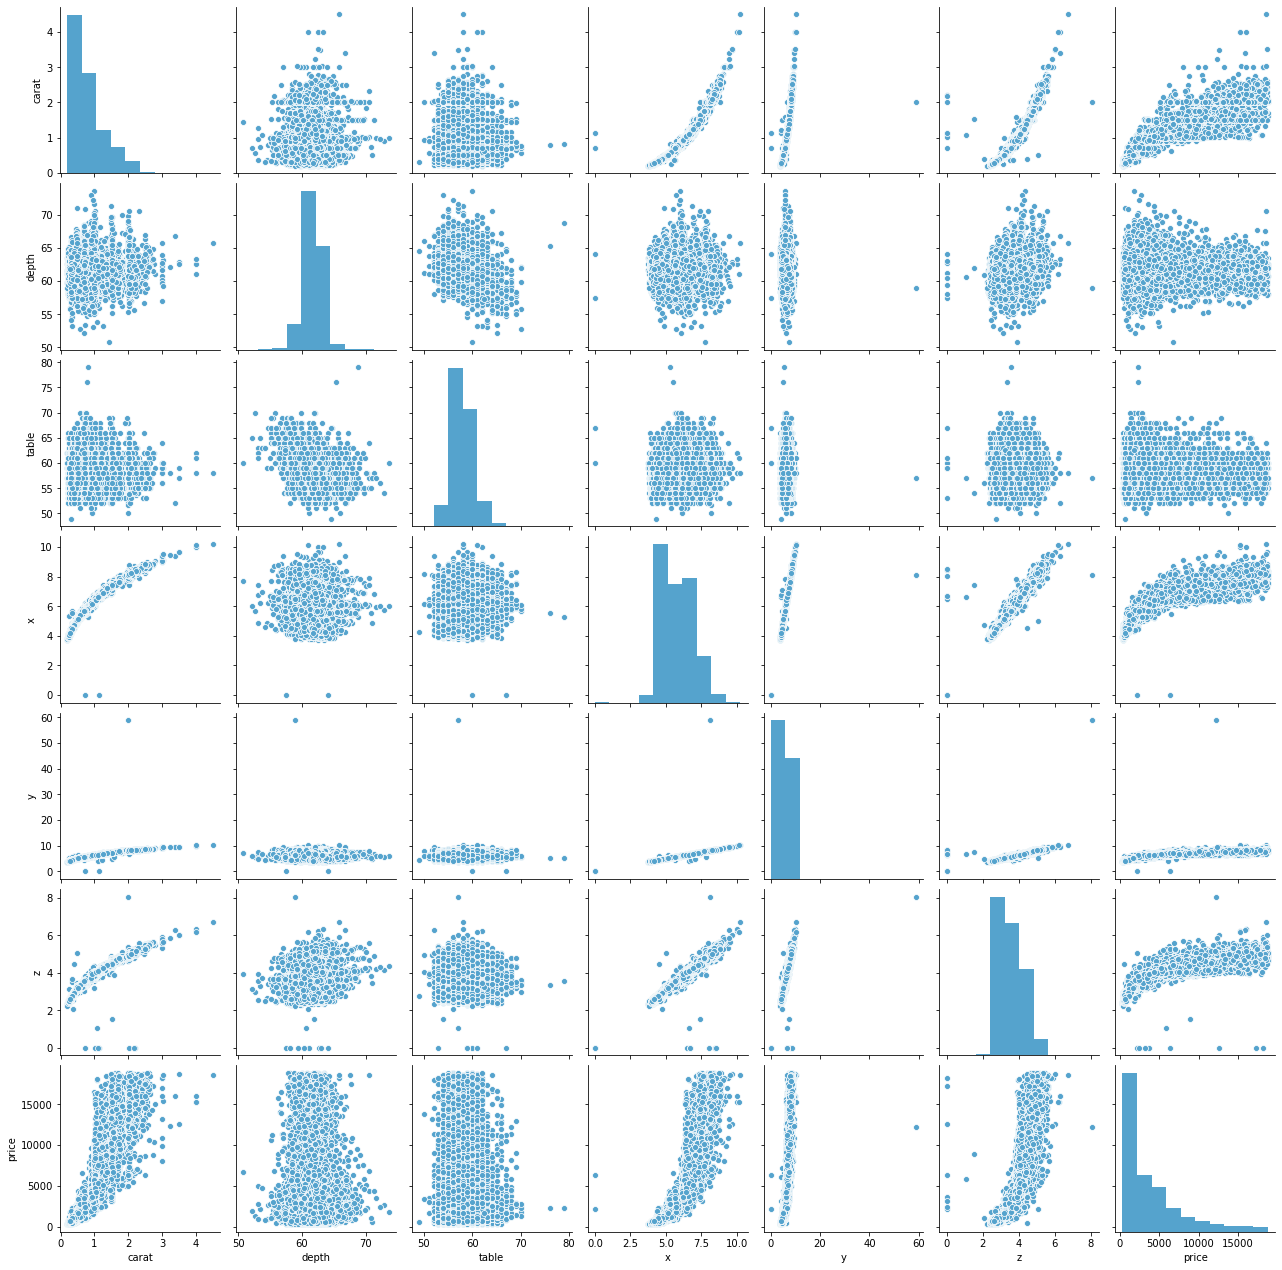

In [35]:
sns.pairplot(vars= zir_df_final[num], data=zir_df_final, palette='crest')

Observation from the pairplot
1. There a a very high corr among Price and x,y and z. There seems a exponential relationship. Slight increase in x,y or z will have huge impact on the price.
2. There seems a +ve corr btw Price and Carat.
3. There is a +ve corr btw x,y and z. Which can lead us to multicollinearity.
4. x,y and z all seems to have a +ve corr with caret
5. Rest we can see from the heatmap or the corr() plot and reg plot

In [36]:
corr = zir_df_final[num].corr()
round(corr,2)

,carat,depth,table,x,y,z,price
carat,1.00,0.04,0.18,0.98,0.94,0.97,0.92
depth,0.04,1.00,-0.30,-0.02,-0.02,0.10,-0.00
table,0.18,-0.30,1.00,0.20,0.18,0.16,0.13
x,0.98,-0.02,0.20,1.00,0.96,0.99,0.89
y,0.94,-0.02,0.18,0.96,1.00,0.96,0.86
z,0.97,0.10,0.16,0.99,0.96,1.00,0.88
price,0.92,-0.00,0.13,0.89,0.86,0.88,1.00


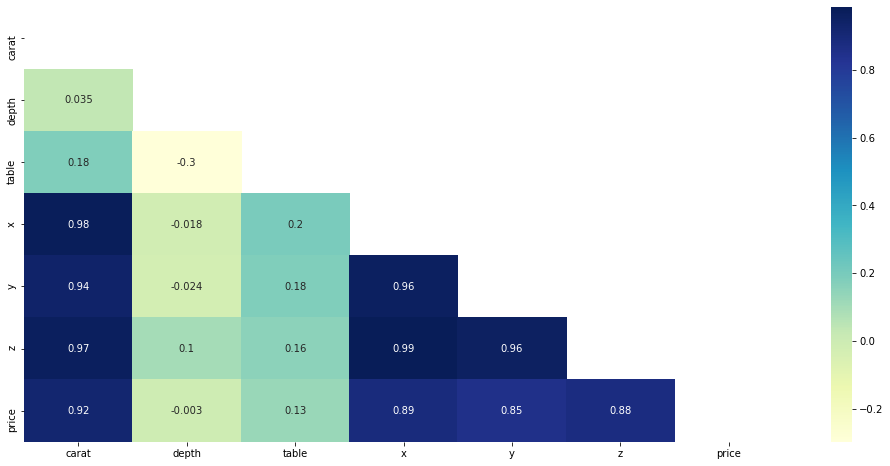

In [37]:
fig_dims = (17, 8)
fig = plt.subplots(figsize=fig_dims)
mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
sns.heatmap(round(corr,3), annot=True, mask=mask, cmap="YlGnBu")

### Observation

1. From the heatmap we can see that Price has a high +ve corr with Caret, x,y and z.
2. x, y and z has high +ve corr among themselves

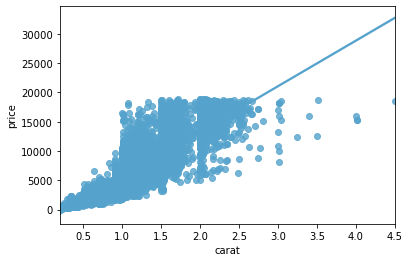

In [38]:
sns.regplot(x=zir_df_final['carat'],y=zir_df_final['price'])

Observation
1. Price has a positive corr with Carat.
2. Few data points of higher carat rating are deviating from the reg plot

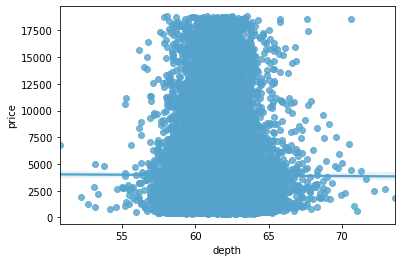

In [39]:
sns.regplot(x=zir_df_final['depth'],y=zir_df_final['price'])

Observation
1. At any value Depth has no or very low corr with price. Therefore, the regression line is a straight.
2. From the Heatmap shown above a negative corr of -0.003 can be seen which is close to zero and that explains an almost straight line.
2. Most of the data points of Depth are between price level 55 to 70.


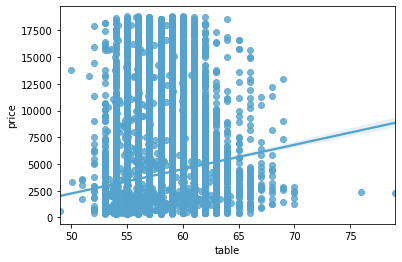

In [40]:
sns.regplot(x=zir_df_final['table'],y=zir_df_final['price'])

Observation
1. As per the reg plot there is a slight positive corr btw Price and Table. We can confirm this from the heatmap as well.
 
2. It can be seen that although there is a positive corr btw price and table, still it looks like the data points for table is scattered throughout. Some data points are leading to the positive corr.


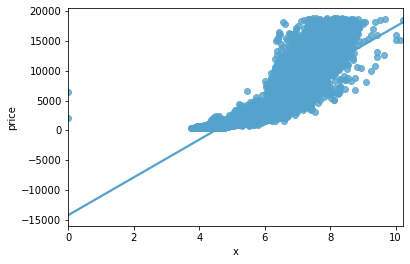

In [41]:
sns.regplot(x=zir_df_final['x'],y=zir_df_final['price'])

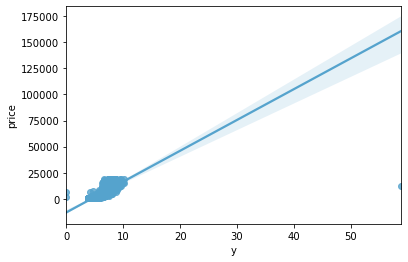

In [42]:
sns.regplot(x=zir_df_final['y'],y=zir_df_final['price'])  

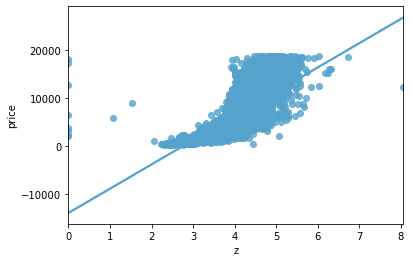

In [43]:
sns.regplot(x=zir_df_final['z'],y=zir_df_final['price'])  

Observation
1. As per the reg plot there is a strong positive corr btw Price and x,y and z. We can confirm this from the heatmap as well.
 
2. x(Lenght) and z has more spread in the data as compared to y. 
3. Due to presence of extreme outlier in y( width) the spread of y is more that what appears. Also, the CI line is wider for to show the outlier in the variable.


## Categorical & Categorical

In [44]:
plt.figure(figsize=(15,8))

<Figure size 1080x576 with 0 Axes>

<Figure size 1080x576 with 0 Axes>

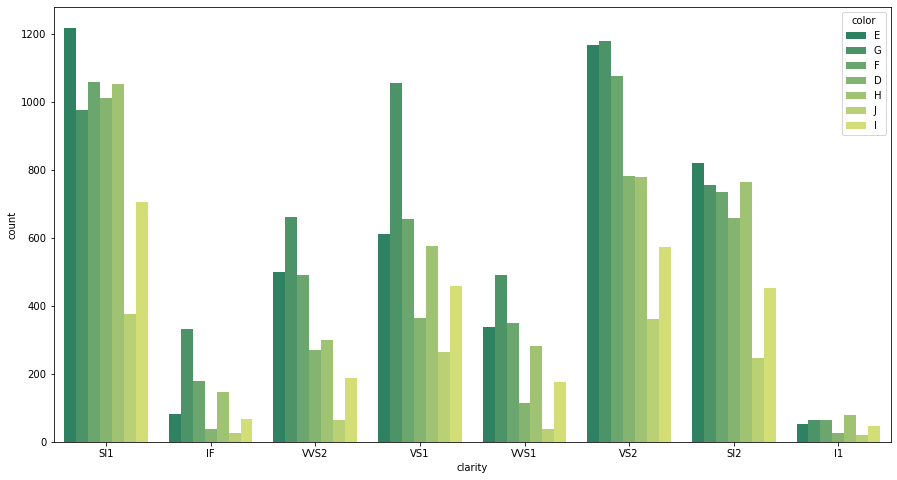

In [45]:
#clarity & color
plt.figure(figsize=(15,8))
sns.countplot(x='clarity', hue='color', data=zir_df_final, palette= "summer")
plt.show()

In [46]:
pd.crosstab(zir_df_final.color, zir_df_final.clarity, margins=True, normalize= True)

clarity,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2,All
color,,,,,,,,,
D,0.000953,0.001448,0.038535,0.025156,0.013836,0.029806,0.004383,0.010329,0.124447
E,0.001944,0.003164,0.046463,0.031293,0.023289,0.044557,0.012883,0.019058,0.182650
F,0.002478,0.006785,0.040326,0.027977,0.025004,0.041012,0.013302,0.018677,0.175560
G,0.002478,0.012654,0.037277,0.028777,0.040250,0.044976,0.018753,0.025271,0.210436
H,0.003049,0.005641,0.040136,0.029158,0.021955,0.029654,0.010787,0.011473,0.151852
I,0.001791,0.002516,0.026948,0.017266,0.017533,0.021802,0.006708,0.007204,0.101769
J,0.000800,0.000991,0.014331,0.009453,0.010024,0.013798,0.001448,0.002439,0.053286
All,0.013493,0.033199,0.244016,0.169081,0.151891,0.225606,0.068265,0.094450,1.000000


### Observation
1. As mentioned earlier the manufacturer is manufacturing SL1 and VS2 in majority.
2. Color  G,E and F seems to have more contribution than the others
3. Color D, I and J have the least contribution.

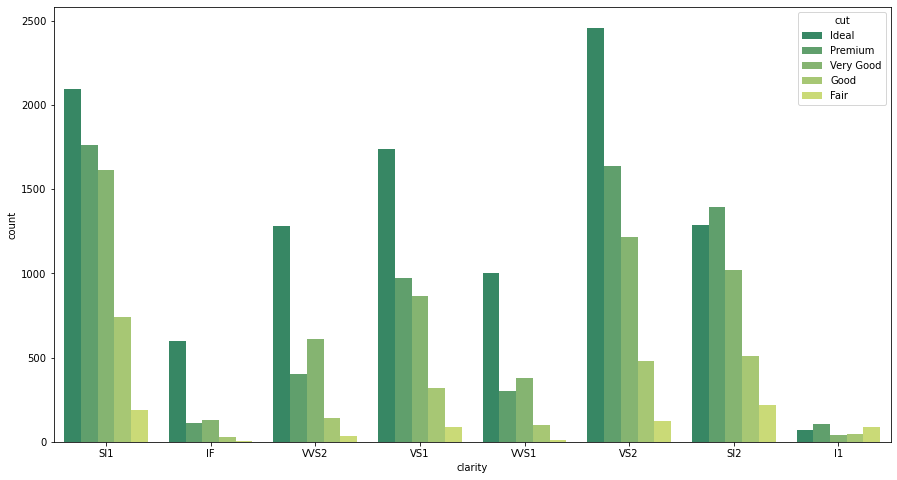

In [47]:
#clarity & cut
plt.figure(figsize=(15,8))
sns.countplot(x='clarity', hue='cut', data=zir_df_final, palette= "summer")
plt.show()

In [48]:
pd.crosstab(zir_df_final.cut, zir_df_final.clarity, margins=True, normalize =True)

clarity,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2,All
cut,,,,,,,,,
Fair,0.003240,0.000114,0.007204,0.008385,0.003430,0.004650,0.000381,0.001410,0.028815
Good,0.001868,0.001143,0.028320,0.019477,0.012235,0.018372,0.003773,0.005374,0.090563
Ideal,0.002744,0.022831,0.079852,0.049055,0.066207,0.093726,0.038268,0.048864,0.401547
Premium,0.004040,0.004269,0.067236,0.053209,0.037010,0.062433,0.011511,0.015437,0.255146
Very Good,0.001601,0.004841,0.061404,0.038954,0.033008,0.046425,0.014331,0.023365,0.223929
All,0.013493,0.033199,0.244016,0.169081,0.151891,0.225606,0.068265,0.094450,1.000000


## Observations
1. From the barplot it can be seen that in each Clarity Ideal cut is in majority. Except for I1 & SI2
2. From the bar graph we can see that IF,VVS1 and VVS2  Clarity has more Ideal  cut diamonds. As per the data these are the best 3 qualities of diamond.
3. I1 being the worst clarity, shows that the contribution of all the cuts are almost similar. Although Premium still has the highest contribution in I1. 

## Observation
1. From the bar graph we can see that IF,VVS1 and VVS2  Clarity has more Ideal  cut diamonds. As per the data these are the best 3 qualities of diamond.
2. I1 being the worst clarity, shows that the contribution of all the cuts are almost similar. Although Premium still has the hihgest contribution in I1.
3. Most of the dataset in clarity belongs to Ideal cut category (40%), followed by Premium and Very good cut quality 
4. SI1 and VS2 seems to have a mojor contribution of 24% and 22%, respectively.
 

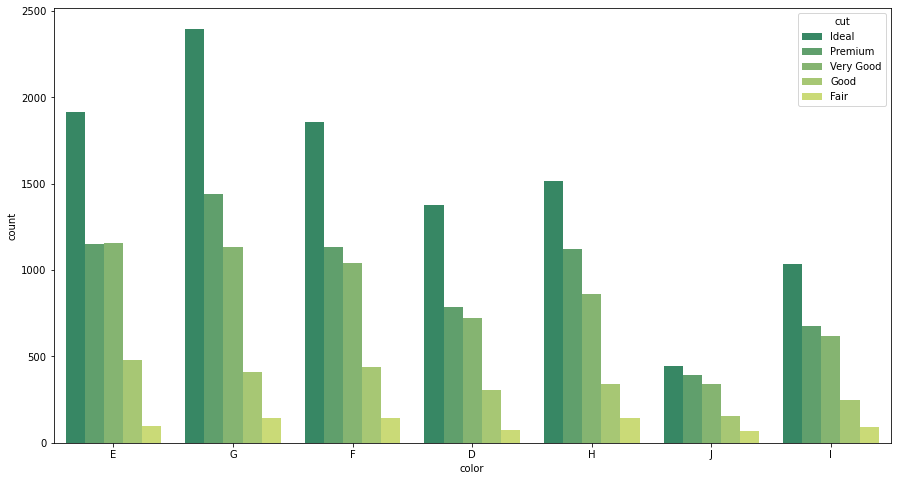

In [49]:
#Color & Cut
plt.figure(figsize=(15,8))
sns.countplot(x='color', hue='cut', data=zir_df_final, palette='summer')

In [50]:
pd.crosstab(zir_df_final.cut, zir_df_final.color, margins=True, normalize=False)

color,D,E,F,G,H,I,J,All
cut,,,,,,,,
Fair,73,96,142,144,145,89,67,756
Good,305,479,440,408,338,250,156,2376
Ideal,1376,1914,1854,2397,1517,1035,442,10535
Premium,787,1148,1131,1438,1123,677,390,6694
Very Good,724,1155,1039,1134,861,619,343,5875
All,3265,4792,4606,5521,3984,2670,1398,26236



## Observations
1. From the barplot it can be seen that in each Clarity Ideal cut is in majority.
2. Color G being the highest contributor of ideal cut data points followed by E and F.

## Barplot - Categorical & Numeric

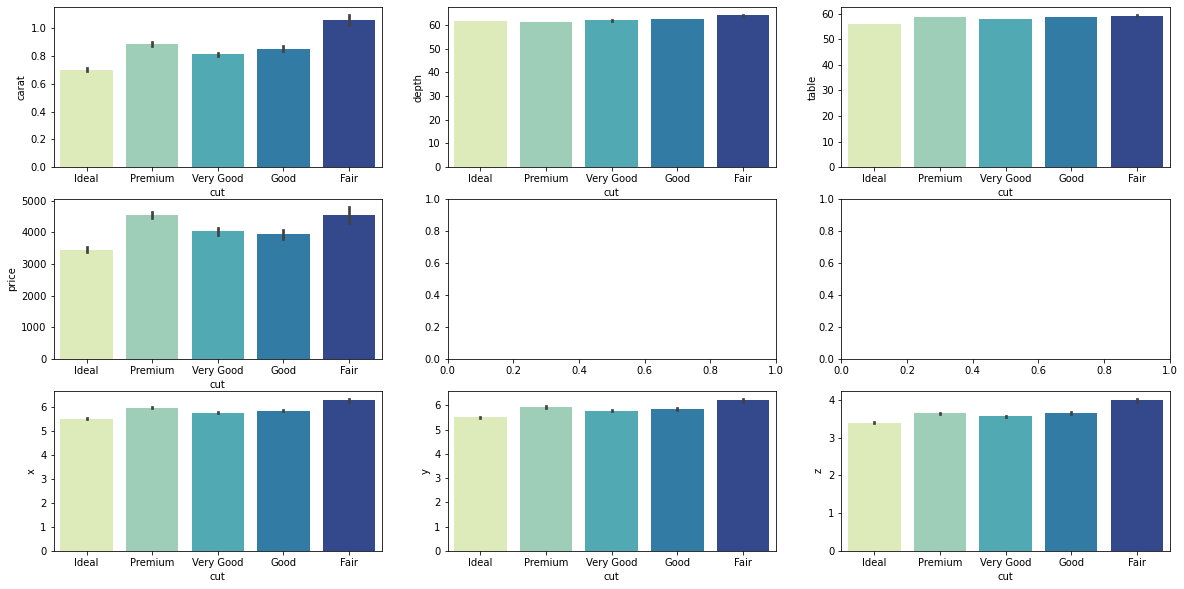

In [51]:
#only with Cut
fig_dims = (20, 10)
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=fig_dims)
sns.barplot(x='cut', y='carat', data=zir_df_final, ax=axs[0][0], palette='YlGnBu')
sns.barplot(x='cut', y='depth', data=zir_df_final, ax=axs[0][1], palette='YlGnBu')
sns.barplot(x='cut', y='table', data=zir_df_final, ax=axs[0][2], palette='YlGnBu')
sns.barplot(x='cut', y='price', data=zir_df_final, ax=axs[1][0], palette='YlGnBu')
sns.barplot(x='cut', y='x', data=zir_df_final, ax=axs[2][0], palette='YlGnBu')
sns.barplot(x='cut', y='y', data=zir_df_final, ax=axs[2][1], palette='YlGnBu')
sns.barplot(x='cut', y='z', data=zir_df_final, ax=axs[2][2], palette='YlGnBu')

## Observations
1. Fair being the lowest quality diamond caret weights more compared to others. Also, Idea cut being the best quality cut diamond has less caret weight
2. Depth and TAble being avg value doesnt have any major diffence accross dataset
3. Premium cut and Fair cut seems to have higher price than the others. Ideal cut has the lowest price as compared to the others.
4. x, y and z has the similar behavior among cut




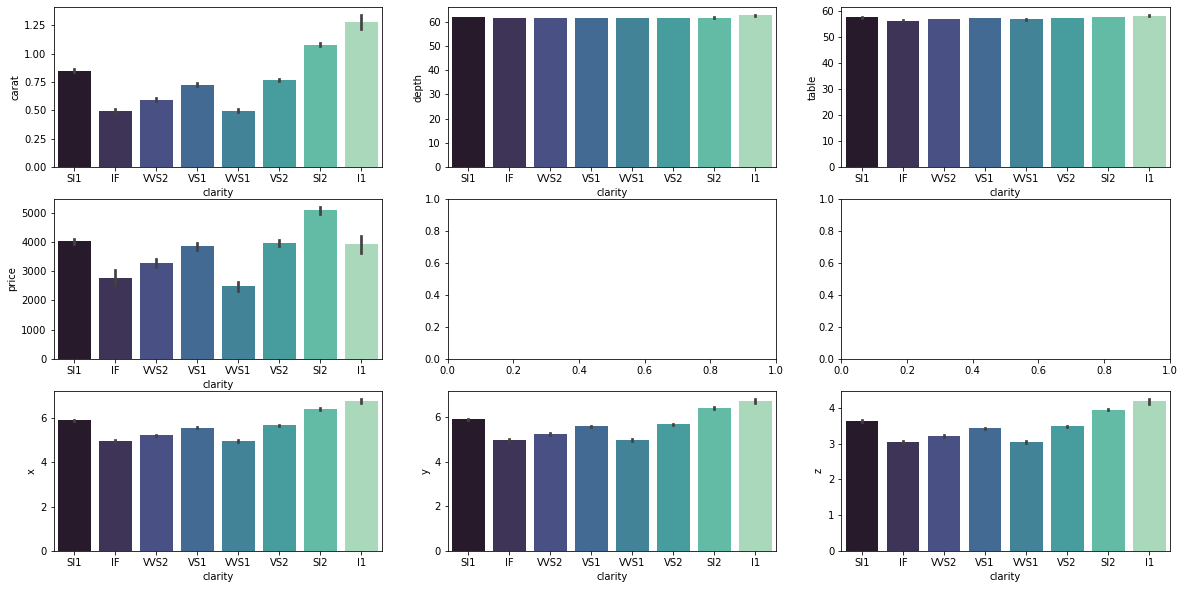

In [52]:
#only with Clarity
fig_dims = (20, 10)
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=fig_dims)
sns.barplot(x='clarity', y='carat', data=zir_df_final, ax=axs[0][0], palette="mako")
sns.barplot(x='clarity', y='depth', data=zir_df_final, ax=axs[0][1], palette="mako")
sns.barplot(x='clarity', y='table', data=zir_df_final, ax=axs[0][2], palette="mako")
sns.barplot(x='clarity', y='price', data=zir_df_final, ax=axs[1][0], palette="mako")
sns.barplot(x='clarity', y='x', data=zir_df_final, ax=axs[2][0], palette="mako")
sns.barplot(x='clarity', y='y', data=zir_df_final, ax=axs[2][1], palette="mako")
sns.barplot(x='clarity', y='z', data=zir_df_final, ax=axs[2][2], palette="mako")

## Observations
1. I1 beingh the worst Clarity has max caret weights meaning it contains more no of blemishes.
2. SI2 CLarity has the highest price. Whereas IF, VVS1 and VVS2 being the top3 clarity has lower price than the other clarity diamonds.
3. I1 clarity diamonds seems to be bogger in size compared to others as there x, y a nd z values are more than others.



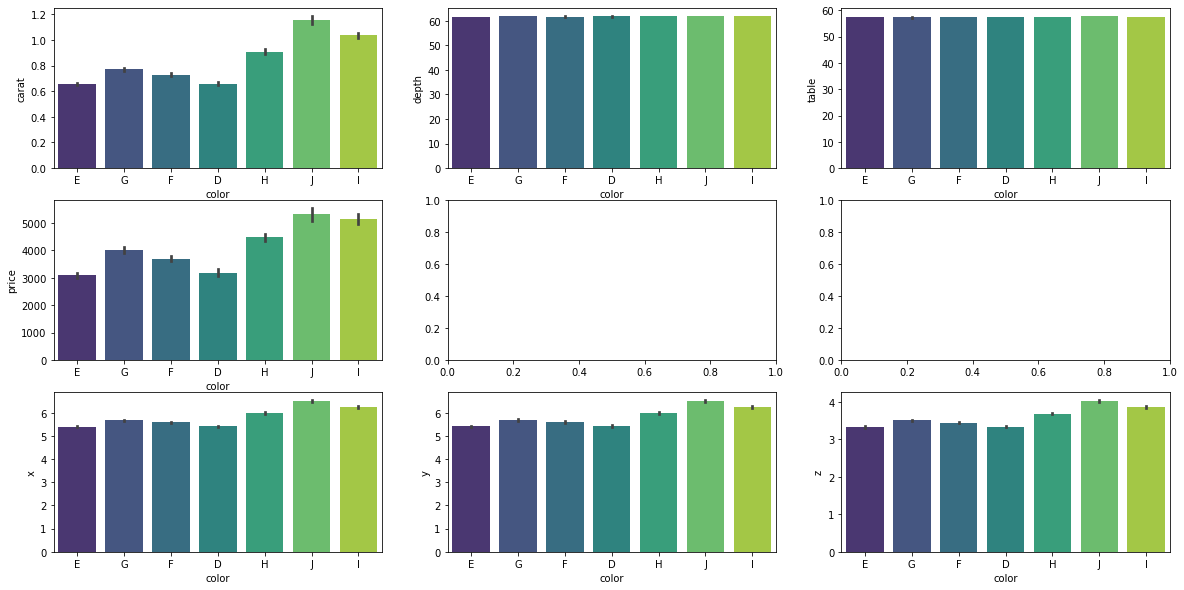

In [53]:
#only with color
fig_dims = (20, 10)
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=fig_dims)
sns.barplot(x='color', y='carat', data=zir_df_final, ax=axs[0][0], palette="viridis")
sns.barplot(x='color', y='depth', data=zir_df_final, ax=axs[0][1], palette="viridis")
sns.barplot(x='color', y='table', data=zir_df_final, ax=axs[0][2], palette="viridis")
sns.barplot(x='color', y='price', data=zir_df_final, ax=axs[1][0], palette="viridis")
sns.barplot(x='color', y='x', data=zir_df_final, ax=axs[2][0], palette="viridis")
sns.barplot(x='color', y='y', data=zir_df_final, ax=axs[2][1], palette="viridis")
sns.barplot(x='color', y='z', data=zir_df_final, ax=axs[2][2], palette="viridis")

## Observations
1. From the bar graph  it seems that -Color J has high caret weight followed by color I. while color E and D has the lower caret weights compared to others.
2. Color J and COlor I has the highest price diamonds. 
3. Diamonds belonging to COlor E and Color D has the lowest Price.
4. Diamonds belonging to Color J and I seems to be bigger in size than other colors. Rest are almost similar in size


## Fetch Outliers

### Upper Bound

In [54]:
carat_whisk_high=zir_df_final.carat.quantile(0.75) + (1.5*(zir_df_final.carat.quantile(0.75) - zir_df_final.carat.quantile(0.25)))
print("Carat Higher whisk = ",carat_whisk_high)

depth_whisk_high=zir_df_final.depth.quantile(0.75) + (1.5*(zir_df_final.depth.quantile(0.75) - zir_df_final.depth.quantile(0.25)))
print("depth Higher whisk = ",depth_whisk_high)

table_whisk_high=zir_df_final.table.quantile(0.75) + (1.5*(zir_df_final.table.quantile(0.75) - zir_df_final.table.quantile(0.25)))
print("table Higher whisk = ",table_whisk_high)

x_whisk_high=zir_df_final.x.quantile(0.75) + (1.5*(zir_df_final.x.quantile(0.75) - zir_df_final.x.quantile(0.25)))
print("x Higher whisk = ",x_whisk_high)

y_whisk_high=zir_df_final.y.quantile(0.75) + (1.5*(zir_df_final.y.quantile(0.75) - zir_df_final.y.quantile(0.25)))
print("y Higher whisk = ",y_whisk_high)

z_whisk_high=zir_df_final.z.quantile(0.75) + (1.5*(zir_df_final.z.quantile(0.75) - zir_df_final.z.quantile(0.25)))
print("z Higher whisk = ",z_whisk_high)

Carat Higher whisk =  2.0250000000000004
depth Higher whisk =  64.75
table Higher whisk =  63.5
x Higher whisk =  9.285
y Higher whisk =  9.27
z Higher whisk =  5.75


In [55]:
print("Carat has number of Outleirs at upper side",zir_df_final[zir_df_final['carat'] > carat_whisk_high]['carat'].shape[0])
print("depth has number of Outleirs at upper side",zir_df_final[zir_df_final['depth'] > depth_whisk_high]['depth'].shape[0])
print("table has number of Outleirs at upper side",zir_df_final[zir_df_final['table'] > table_whisk_high]['table'].shape[0])
print("x has number of Outleirs at upper side",zir_df_final[zir_df_final['x'] > x_whisk_high]['x'].shape[0])
print("y has number of Outleirs at upper side",zir_df_final[zir_df_final['y'] > y_whisk_high]['y'].shape[0])
print("z has number of Outleirs at upper side",zir_df_final[zir_df_final['z'] > z_whisk_high]['z'].shape[0])

Carat has number of Outleirs at upper side 638
depth has number of Outleirs at upper side 486
table has number of Outleirs at upper side 302
x has number of Outleirs at upper side 13
y has number of Outleirs at upper side 12
z has number of Outleirs at upper side 11


### Lower Bound

In [56]:
carat_whisk_low=zir_df_final.carat.quantile(0.25) - (1.5*(zir_df_final.carat.quantile(0.75) - zir_df_final.carat.quantile(0.25)))
print("Carat lower whisk = ",carat_whisk_low)

depth_whisk_low=zir_df_final.depth.quantile(0.25) - (1.5*(zir_df_final.depth.quantile(0.75) - zir_df_final.depth.quantile(0.25)))
print("depth lower whisk = ",depth_whisk_low)

table_whisk_low=zir_df_final.table.quantile(0.25) - (1.5*(zir_df_final.table.quantile(0.75) - zir_df_final.table.quantile(0.25)))
print("table lower whisk = ",table_whisk_low)

x_whisk_low=zir_df_final.x.quantile(0.25) - (1.5*(zir_df_final.x.quantile(0.75) - zir_df_final.x.quantile(0.25)))
print("x lower whisk = ",x_whisk_low)

y_whisk_low=zir_df_final.y.quantile(0.25) - (1.5*(zir_df_final.y.quantile(0.75) - zir_df_final.y.quantile(0.25)))
print("y lower whisk = ",y_whisk_low)

z_whisk_low=zir_df_final.z.quantile(0.25) - (1.5*(zir_df_final.z.quantile(0.75) - zir_df_final.z.quantile(0.25)))
print("z lower whisk = ",z_whisk_low)

Carat lower whisk =  -0.5750000000000001
depth lower whisk =  58.75
table lower whisk =  51.5
x lower whisk =  1.9649999999999999
y lower whisk =  1.9899999999999993
z lower whisk =  1.1899999999999997


In [57]:
print("Carat has number of Outleirs at Lower side",zir_df_final[zir_df_final['carat'] < carat_whisk_low]['carat'].shape)
print("depth has number of Outleirs at Lower side",zir_df_final[zir_df_final['depth'] < depth_whisk_low]['depth'].shape)
print("table has number of Outleirs at Lower side",zir_df_final[zir_df_final['table'] < table_whisk_low]['table'].shape)
print("x has number of Outleirs at Lower side",zir_df_final[zir_df_final['x'] < x_whisk_low]['x'].shape)
print("y has number of Outleirs at Lower side",zir_df_final[zir_df_final['y'] < y_whisk_low]['y'].shape)
print("z has number of Outleirs at Lower side",zir_df_final[zir_df_final['z'] < z_whisk_low]['z'].shape)

Carat has number of Outleirs at Lower side (0,)
depth has number of Outleirs at Lower side (733,)
table has number of Outleirs at Lower side (7,)
x has number of Outleirs at Lower side (2,)
y has number of Outleirs at Lower side (2,)
z has number of Outleirs at Lower side (9,)


### Outlier Treatment

- As we have many outlierswe Lets remove thye records which has value higher than upper bound and less than lower bound and check the number of obeservations. 
- if only few hundred records are dropped then we would have still stsufficient records for the model to learn. 

In [58]:
zir_df_final=zir_df_final[(zir_df_final['carat']<=carat_whisk_high) & (zir_df_final['carat']>=carat_whisk_low)]
print(zir_df_final.shape)

zir_df_final=zir_df_final[(zir_df_final['depth']<=depth_whisk_high) & (zir_df_final['depth']>=depth_whisk_low)]
print(zir_df_final.shape)

zir_df_final=zir_df_final[(zir_df_final['table']<=table_whisk_high) & (zir_df_final['table']>=table_whisk_low)]
print(zir_df_final.shape)

zir_df_final=zir_df_final[(zir_df_final['x']<=x_whisk_high) & (zir_df_final['x']>=x_whisk_low)]
print(zir_df_final.shape)

zir_df_final=zir_df_final[(zir_df_final['y']<=y_whisk_high) & (zir_df_final['y']>=y_whisk_low)]
print(zir_df_final.shape)

zir_df_final=zir_df_final[(zir_df_final['z']<=z_whisk_high) & (zir_df_final['z']>=z_whisk_low)]
print(zir_df_final.shape)

(25598, 10)
(24425, 10)
(24236, 10)
(24235, 10)
(24234, 10)
(24230, 10)


In [59]:
zir_df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24230 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    24230 non-null  float64
 1   cut      24230 non-null  object 
 2   color    24230 non-null  object 
 3   clarity  24230 non-null  object 
 4   depth    24230 non-null  float64
 5   table    24230 non-null  float64
 6   x        24230 non-null  float64
 7   y        24230 non-null  float64
 8   z        24230 non-null  float64
 9   price    24230 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.0+ MB


-  after Removing outliers we have 24K records, so overall we have removed 2K records during Missing value, Duplicate and Outlier Treatment.

#### HistoGram Plot after Removing outliers

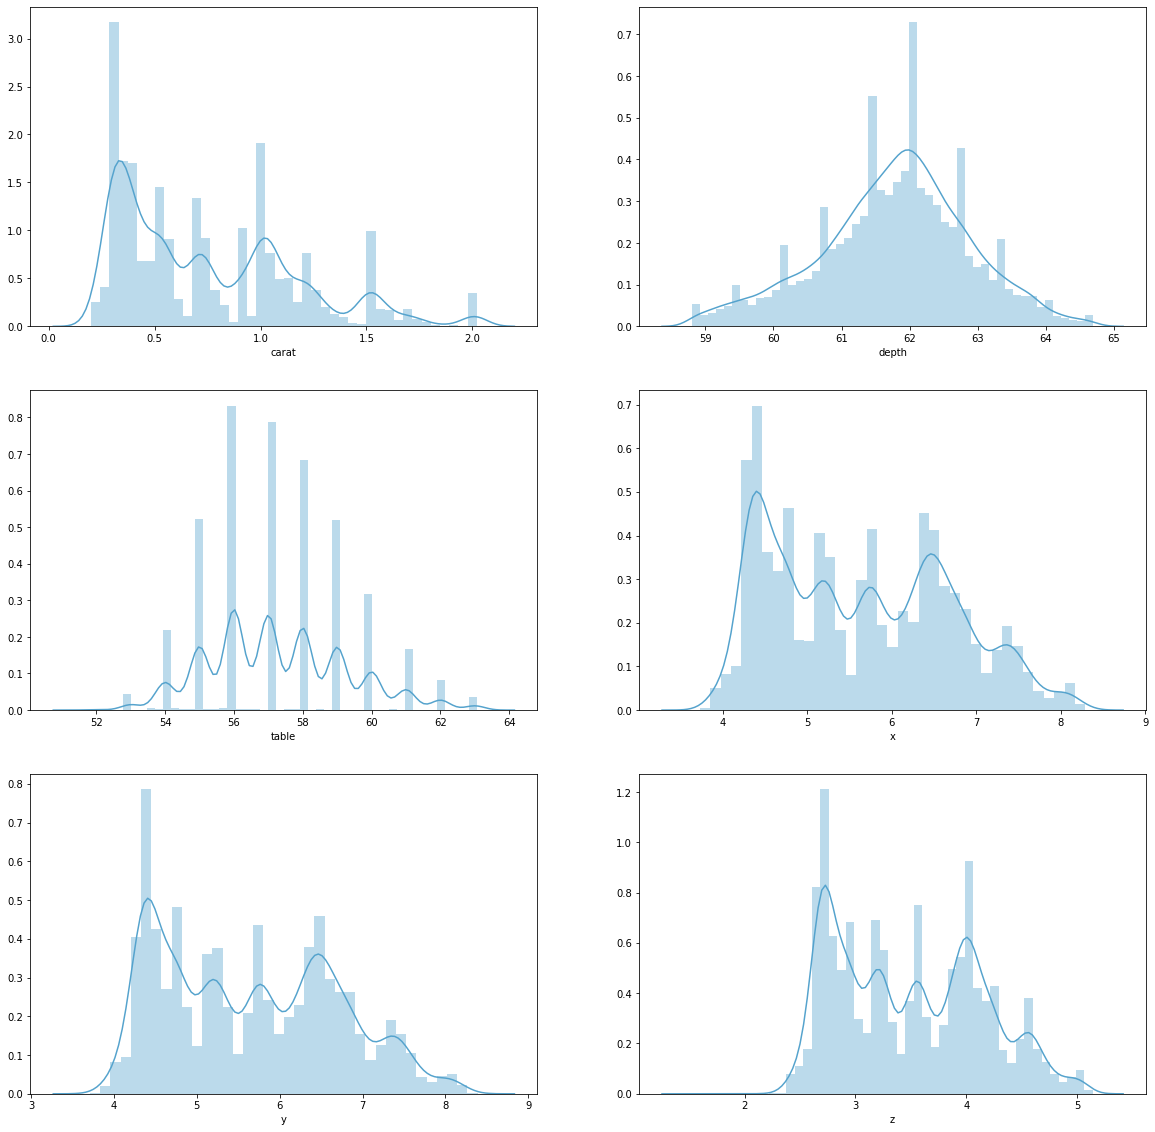

In [222]:
f,ax=plt.subplots(3,2,figsize=(20,20))
sns.distplot(zir_df_final.carat,ax=ax[0,0])
sns.distplot(zir_df_final.depth,ax=ax[0,1])
sns.distplot(zir_df_final.table,ax=ax[1,0])
sns.distplot(zir_df_final.x,ax=ax[1,1])
sns.distplot(zir_df_final.y,ax=ax[2,0])
sns.distplot(zir_df_final.z,ax=ax[2,1])

### Box Plot after Removing the Outlier

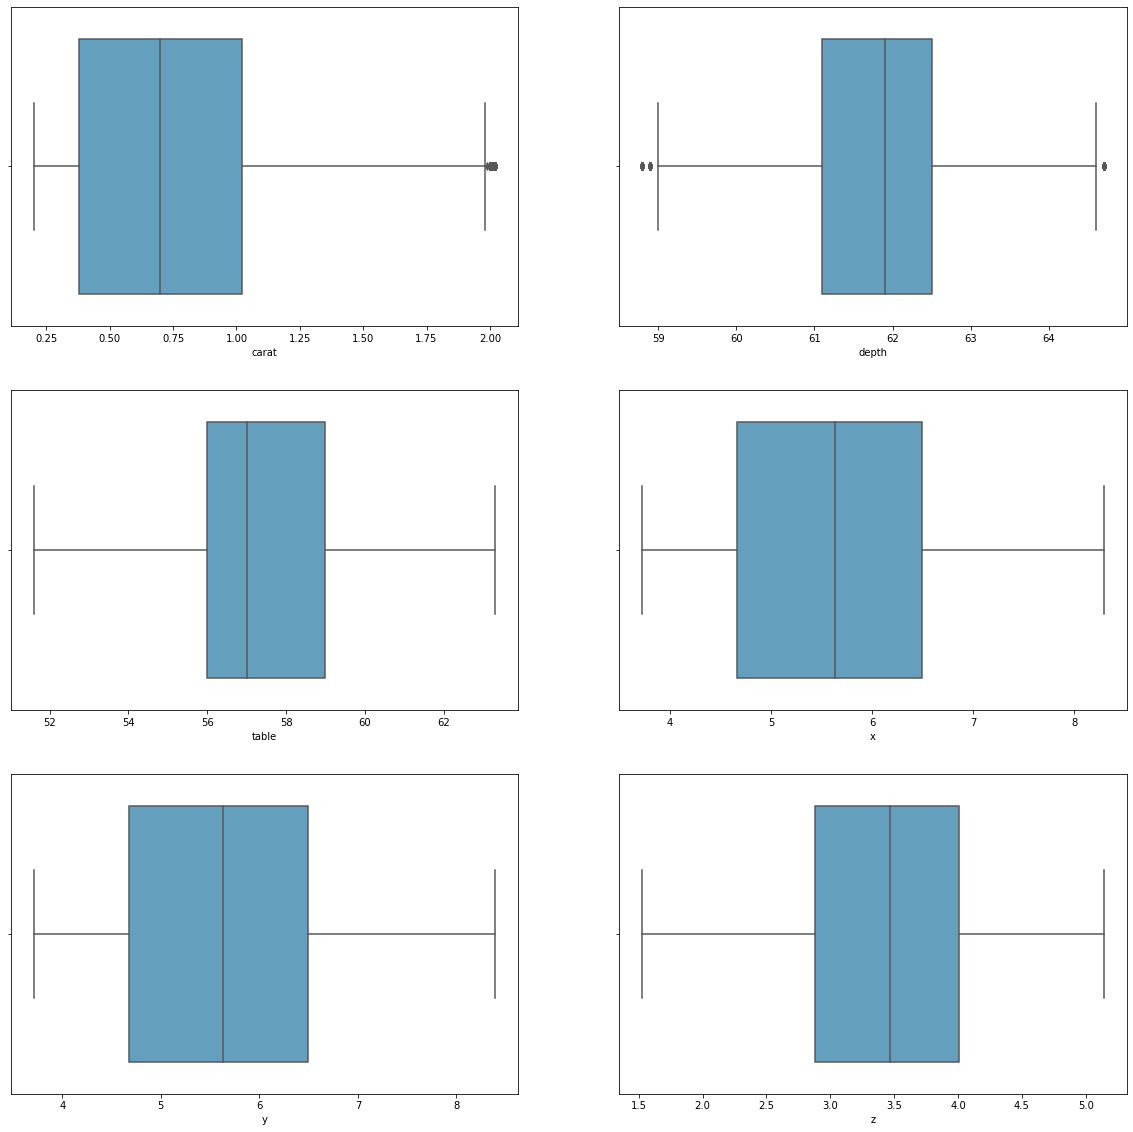

In [223]:
f,ax=plt.subplots(3,2,figsize=(20,20))
sns.boxplot(zir_df_final.carat,ax=ax[0,0])
sns.boxplot(zir_df_final.depth,ax=ax[0,1])
sns.boxplot(zir_df_final.table,ax=ax[1,0])
sns.boxplot(zir_df_final.x,ax=ax[1,1])
sns.boxplot(zir_df_final.y,ax=ax[2,0])
sns.boxplot(zir_df_final.z,ax=ax[2,1])

#### Bi-Variate Analysis

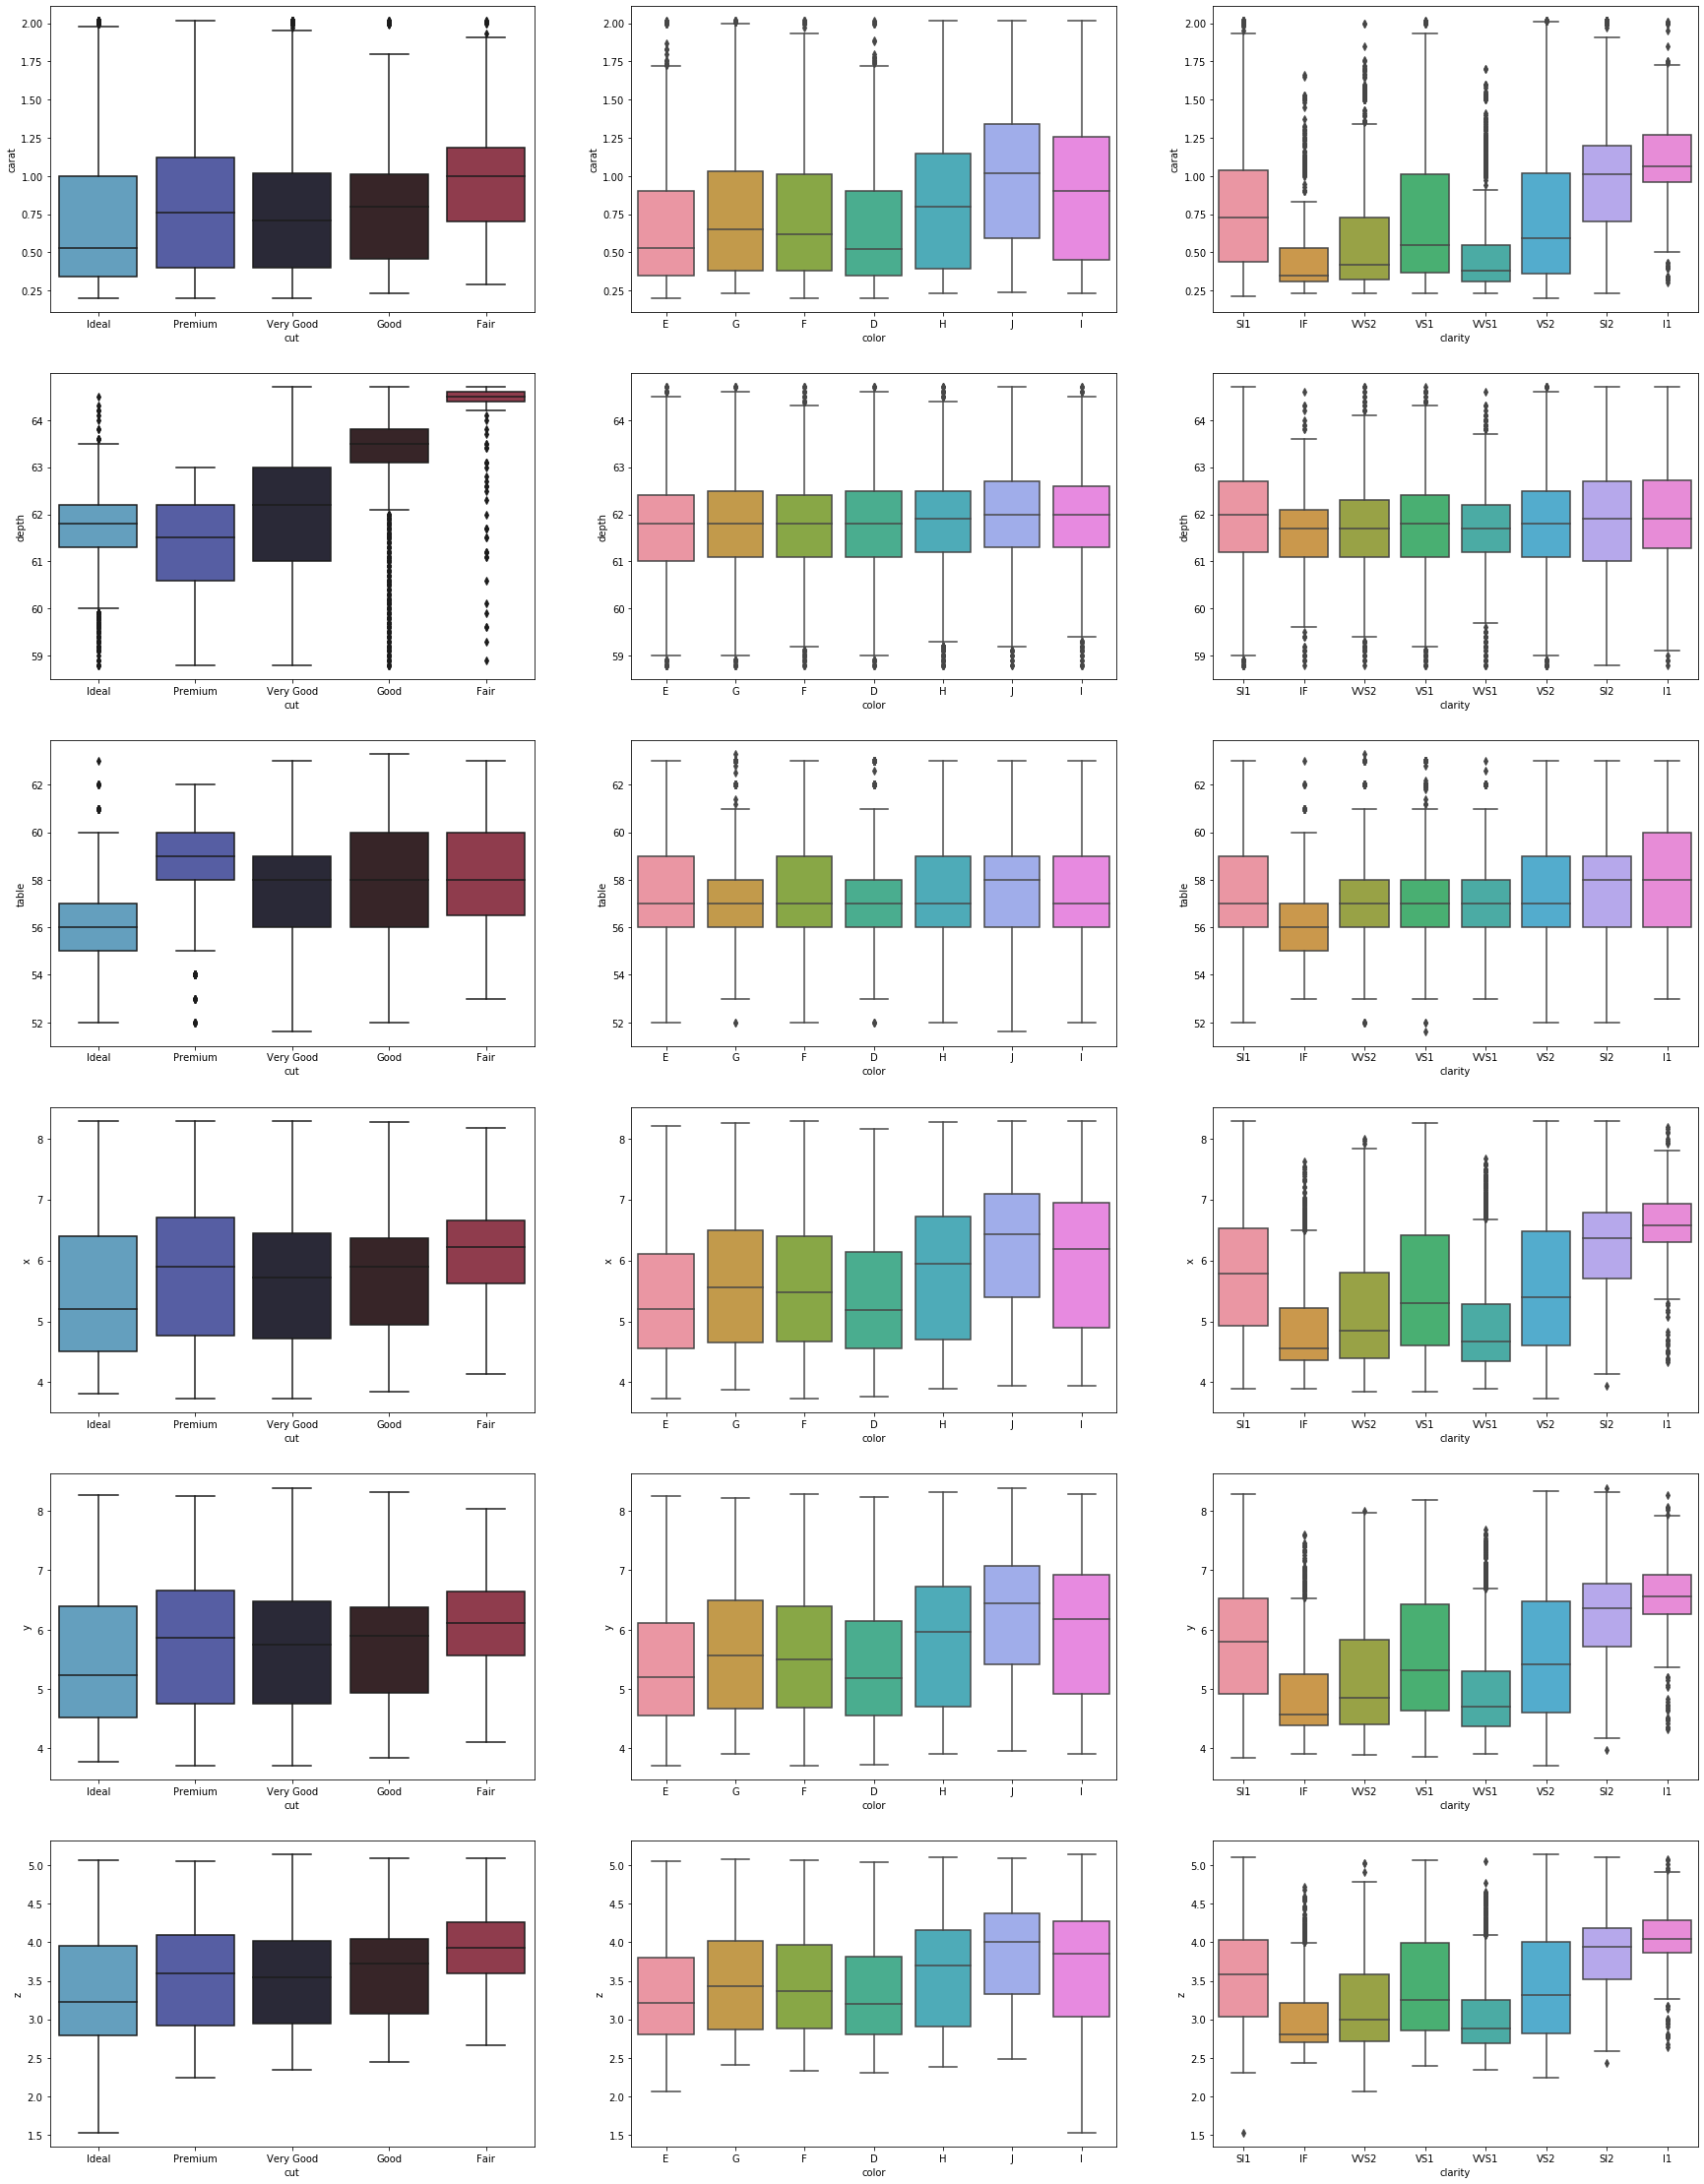

In [224]:
f,ax=plt.subplots(6,3,figsize=(30,40))
sns.boxplot(zir_df_final.cut,zir_df_final.carat,ax=ax[0,0])
sns.boxplot(zir_df_final.color,zir_df_final.carat,ax=ax[0,1])
sns.boxplot(zir_df_final.clarity,zir_df_final.carat,ax=ax[0,2])

sns.boxplot(zir_df_final.cut,zir_df_final.depth,ax=ax[1,0])
sns.boxplot(zir_df_final.color,zir_df_final.depth,ax=ax[1,1])
sns.boxplot(zir_df_final.clarity,zir_df_final.depth,ax=ax[1,2])

sns.boxplot(zir_df_final.cut,zir_df_final.table,ax=ax[2,0])
sns.boxplot(zir_df_final.color,zir_df_final.table,ax=ax[2,1])
sns.boxplot(zir_df_final.clarity,zir_df_final.table,ax=ax[2,2])

sns.boxplot(zir_df_final.cut,zir_df_final.x,ax=ax[3,0])
sns.boxplot(zir_df_final.color,zir_df_final.x,ax=ax[3,1])
sns.boxplot(zir_df_final.clarity,zir_df_final.x,ax=ax[3,2])

sns.boxplot(zir_df_final.cut,zir_df_final.y,ax=ax[4,0])
sns.boxplot(zir_df_final.color,zir_df_final.y,ax=ax[4,1])
sns.boxplot(zir_df_final.clarity,zir_df_final.y,ax=ax[4,2])

sns.boxplot(zir_df_final.cut,zir_df_final.z,ax=ax[5,0])
sns.boxplot(zir_df_final.color,zir_df_final.z,ax=ax[5,1])
sns.boxplot(zir_df_final.clarity,zir_df_final.z,ax=ax[5,2])



## Linear Regression Assumptions

#### 1. Check the Linearity Between Predictors and Target Variable

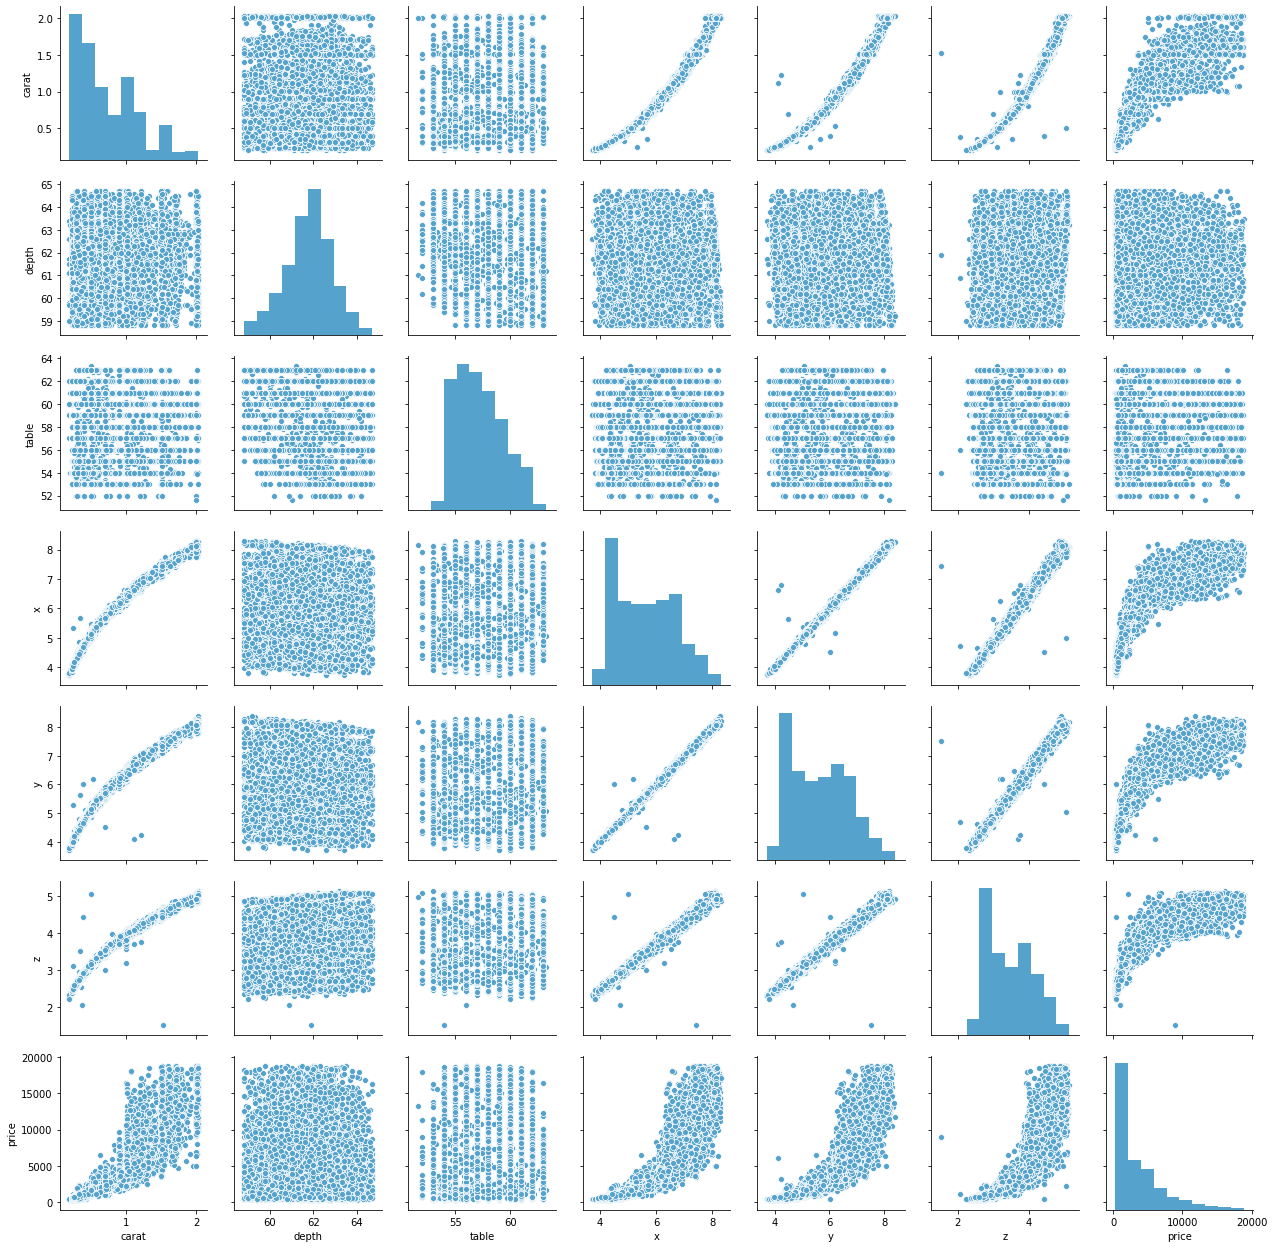

In [225]:
sns.pairplot(zir_df_final[['carat', 'depth', 'table', 'x', 'y', 'z','price']])

#### Check the Multi Collinearity 

In [226]:
df_corr=zir_df_final[['carat', 'depth', 'table', 'x', 'y', 'z','price']].corr()

In [227]:
df_corr

,carat,depth,table,x,y,z,price
carat,1.000000,0.032235,0.192269,0.983594,0.982874,0.982373,0.915558
depth,0.032235,1.000000,-0.236200,-0.010422,-0.012217,0.086620,-0.001116
table,0.192269,-0.236200,1.000000,0.194398,0.189786,0.169451,0.137382
x,0.983594,-0.010422,0.194398,1.000000,0.998569,0.993982,0.878600
y,0.982874,-0.012217,0.189786,0.998569,1.000000,0.993785,0.879897
z,0.982373,0.086620,0.169451,0.993982,0.993785,1.000000,0.875182
price,0.915558,-0.001116,0.137382,0.878600,0.879897,0.875182,1.000000


- Pull the Correlation Co-efficient.
- For Many Variables correlation cofficient is very high > 0.7. 
- For Carat vs x,y and z, coefficient is 0.97,0.94 and 0.96 respectively. So, Carat are highly correlated with x,y and z.
- x,y and z are also highly correlated with each other.

(7.0, 0.0)

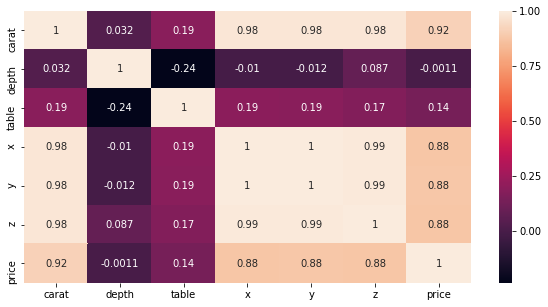

In [228]:
plt.figure(figsize=(10,5))
ax=sns.heatmap(df_corr,annot=True)
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+.5,top-0.5)

#### Convert the categorical variable into continuous

In [60]:
zir_df_final=pd.get_dummies(zir_df_final,drop_first=True)

In [61]:
zir_df_final.head()

,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.30,62.1,58.0,4.27,4.29,2.66,499,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
1,0.33,60.8,58.0,4.42,4.46,2.70,984,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
2,0.90,62.2,60.0,6.04,6.12,3.78,6289,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1
3,0.42,61.6,56.0,4.82,4.80,2.96,1082,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
4,0.31,60.4,59.0,4.35,4.43,2.65,779,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [71]:
zir_df_final.rename(columns={"cut_Very Good": "cut_Very_Good"},inplace=True)

In [72]:
zir_df_final.columns #Checking column name

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price', 'cut_Good',
       'cut_Ideal', 'cut_Premium', 'cut_Very_Good', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2'],
      dtype='object')

In [73]:
zir_df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24230 entries, 0 to 26966
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat          24230 non-null  float64
 1   depth          24230 non-null  float64
 2   table          24230 non-null  float64
 3   x              24230 non-null  float64
 4   y              24230 non-null  float64
 5   z              24230 non-null  float64
 6   price          24230 non-null  int64  
 7   cut_Good       24230 non-null  uint8  
 8   cut_Ideal      24230 non-null  uint8  
 9   cut_Premium    24230 non-null  uint8  
 10  cut_Very_Good  24230 non-null  uint8  
 11  color_E        24230 non-null  uint8  
 12  color_F        24230 non-null  uint8  
 13  color_G        24230 non-null  uint8  
 14  color_H        24230 non-null  uint8  
 15  color_I        24230 non-null  uint8  
 16  color_J        24230 non-null  uint8  
 17  clarity_IF     24230 non-null  uint8  
 18  clarit

In [74]:
zir_df_scaled=zir_df_final.copy()

In [75]:
zir_df_scaled.head()

,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,cut_Premium,cut_Very_Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.30,62.1,58.0,4.27,4.29,2.66,499,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
1,0.33,60.8,58.0,4.42,4.46,2.70,984,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
2,0.90,62.2,60.0,6.04,6.12,3.78,6289,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1
3,0.42,61.6,56.0,4.82,4.80,2.96,1082,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
4,0.31,60.4,59.0,4.35,4.43,2.65,779,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


## Model0

In [76]:
X1 = zir_df_scaled.drop(['price'],axis=1)
X1=sm.add_constant(X1)
y1=zir_df_scaled['price']

In [77]:
model1=sm.OLS(y1,X1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                 1.263e+04
Date:                Mon, 12 Apr 2021   Prob (F-statistic):               0.00
Time:                        01:08:25   Log-Likelihood:            -2.0195e+05
No. Observations:               24230   AIC:                         4.040e+05
Df Residuals:                   24206   BIC:                         4.041e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6180.8309   1038.879      5.950      0.000    4144.564    8217.097
carat          1.437e+04     89.598    160.429      0.000    1.42e+04    1.45e+04
depth           -24.8413     15.082     -1.647      0.100     -54.402       4.720
table           -42.9394      4.248    -10.109      0.000     -51.265     -34.614
x             -2264.8347    147.053    -15.401      0.000   -2553.068   -1976.601
y              1116.9342    145.861      7.658      0.000     831.037    1402.832
z             -1711.8993    227.390     -7.528      0.000   -2157.598   -1266.200
cut_Good        272.7167     84.064      3.244      0.001     107.947     437.487
cut_Ideal       462.6836     83.565      5.537      0.000     298.892     626.475
cut_Premium     433.5390     83.014      5.222      0.000     270.826     596.252
cut_Very_Good   325.0393     82.995      3.916      0.000     162.365     487.714
color_E        -224.6769     23.617     -9.513      0.000    -270.968    -178.386
color_F        -287.6148     23.976    -11.996      0.000    -334.610    -240.620
color_G        -486.3999     23.369    -20.814      0.000    -532.204    -440.596
color_H       -1031.5768     25.109    -41.084      0.000   -1080.791    -982.362
color_I       -1581.7665     28.297    -55.900      0.000   -1637.229   -1526.304
color_J       -2377.5702     35.487    -66.998      0.000   -2447.127   -2308.013
clarity_IF     4451.4066     75.169     59.219      0.000    4304.071    4598.743
clarity_SI1    2890.4923     66.852     43.237      0.000    2759.459    3021.526
clarity_SI2    1953.2030     67.417     28.972      0.000    1821.061    2085.345
clarity_VS1    3797.2788     67.837     55.977      0.000    3664.315    3930.243
clarity_VS2    3474.4909     67.059     51.812      0.000    3343.051    3605.931
clarity_VVS1   4177.9500     70.696     59.097      0.000    4039.381    4316.519
clarity_VVS2   4140.5709     69.303     59.746      0.000    4004.732    4276.410
==============================================================================
Omnibus:                     8918.595   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            85500.161
Skew:                           1.497   Prob(JB):                         0.00
Kurtosis:                      11.702   Cond. No.                     1.38e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.38e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### VIF 

In [78]:
def vif_cal(input_data):
    x_vars=input_data
    xvar_names=input_data.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        x=sm.add_constant(x)
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [79]:
X1.columns

Index(['const', 'carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Good',
       'cut_Ideal', 'cut_Premium', 'cut_Very_Good', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2'],
      dtype='object')

In [80]:
vif_cal(input_data=X1[['const', 'carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Good',
                       'cut_Ideal', 'cut_Premium', 'cut_Very_Good', 'color_E', 'color_F',
                       'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
                       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
                       'clarity_VVS2']])

const  VIF =  0.0
carat  VIF =  34.02
depth  VIF =  6.56
table  VIF =  1.74
x  VIF =  575.75
y  VIF =  560.06
z  VIF =  526.18
cut_Good  VIF =  12.12
cut_Ideal  VIF =  40.68
cut_Premium  VIF =  31.41
cut_Very_Good  VIF =  29.15
color_E  VIF =  2.01
color_F  VIF =  2.0
color_G  VIF =  2.2
color_H  VIF =  1.91
color_I  VIF =  1.66
color_J  VIF =  1.36
clarity_IF  VIF =  4.56
clarity_SI1  VIF =  19.63
clarity_SI2  VIF =  14.09
clarity_VS1  VIF =  14.42
clarity_VS2  VIF =  19.03
clarity_VVS1  VIF =  7.97
clarity_VVS2  VIF =  10.13


- Here x has highest VIF and this is because of Multicollinearity Btween x,y,z and Carat.
- Lets drop x and re-run the model  

## Model1

In [81]:
X2 = zir_df_scaled.drop(['price','x'],axis=1)
X2=sm.add_constant(X2)
y2=zir_df_scaled['price']

In [82]:
model2=sm.OLS(y2,X2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                 1.307e+04
Date:                Mon, 12 Apr 2021   Prob (F-statistic):               0.00
Time:                        01:23:06   Log-Likelihood:            -2.0207e+05
No. Observations:               24230   AIC:                         4.042e+05
Df Residuals:                   24207   BIC:                         4.044e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           266.2350    969.991      0.274      0.784   -1635.008    2167.478
carat          1.415e+04     88.870    159.255      0.000     1.4e+04    1.43e+04
depth            64.0164     14.002      4.572      0.000      36.571      91.462
table           -42.5448      4.268     -9.968      0.000     -50.911     -34.179
y               -42.4458    125.544     -0.338      0.735    -288.519     203.627
z             -3364.9187    201.442    -16.704      0.000   -3759.758   -2970.080
cut_Good        364.0028     84.263      4.320      0.000     198.843     529.163
cut_Ideal       524.5079     83.874      6.253      0.000     360.109     688.907
cut_Premium     425.9159     83.417      5.106      0.000     262.414     589.418
cut_Very_Good   423.2740     83.152      5.090      0.000     260.291     586.257
color_E        -225.3358     23.732     -9.495      0.000    -271.852    -178.819
color_F        -289.2609     24.093    -12.006      0.000    -336.484    -242.038
color_G        -488.8983     23.482    -20.820      0.000    -534.924    -442.872
color_H       -1035.3527     25.230    -41.037      0.000   -1084.804    -985.901
color_I       -1580.3194     28.434    -55.578      0.000   -1636.052   -1524.587
color_J       -2370.7885     35.657    -66.489      0.000   -2440.678   -2300.899
clarity_IF     4524.5573     75.384     60.020      0.000    4376.800    4672.315
clarity_SI1    2931.9671     67.122     43.681      0.000    2800.403    3063.531
clarity_SI2    1989.8069     67.703     29.390      0.000    1857.105    2122.509
clarity_VS1    3849.3033     68.082     56.539      0.000    3715.858    3982.749
clarity_VS2    3522.5845     67.312     52.332      0.000    3390.648    3654.521
clarity_VVS1   4244.7620     70.906     59.864      0.000    4105.781    4383.743
clarity_VVS2   4201.1519     69.528     60.424      0.000    4064.872    4337.432
==============================================================================
Omnibus:                     8823.141   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            93677.558
Skew:                           1.445   Prob(JB):                         0.00
Kurtosis:                      12.189   Cond. No.                     1.28e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.28e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [84]:
vif_cal(input_data=X1[['const', 'carat', 'depth', 'table', 'y','z','cut_Good','cut_Ideal',
                       'cut_Premium', 'cut_Very_Good', 'color_E', 'color_F',
                       'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1', 
                       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
                       'clarity_VVS2']])

const  VIF =  0.0
carat  VIF =  33.15
depth  VIF =  5.6
table  VIF =  1.74
y  VIF =  410.89
z  VIF =  408.95
cut_Good  VIF =  12.06
cut_Ideal  VIF =  40.58
cut_Premium  VIF =  31.41
cut_Very_Good  VIF =  28.98
color_E  VIF =  2.01
color_F  VIF =  2.0
color_G  VIF =  2.2
color_H  VIF =  1.91
color_I  VIF =  1.66
color_J  VIF =  1.36
clarity_IF  VIF =  4.54
clarity_SI1  VIF =  19.6
clarity_SI2  VIF =  14.07
clarity_VS1  VIF =  14.39
clarity_VS2  VIF =  18.99
clarity_VVS1  VIF =  7.94
clarity_VVS2  VIF =  10.1


- now variable y has highest VIF.
- dropping y and creating the new model.

### Model2

In [85]:
X3 = zir_df_scaled.drop(['price','x','y'],axis=1)
X3=sm.add_constant(X3)
y3=zir_df_scaled['price']

In [86]:
model3=sm.OLS(y3,X3).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                 1.369e+04
Date:                Mon, 12 Apr 2021   Prob (F-statistic):               0.00
Time:                        01:28:10   Log-Likelihood:            -2.0207e+05
No. Observations:               24230   AIC:                         4.042e+05
Df Residuals:                   24208   BIC:                         4.044e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.8425    581.857      0.007      0.995   -1136.633    1144.318
carat          1.415e+04     87.642    161.430      0.000     1.4e+04    1.43e+04
depth            68.0987      7.091      9.604      0.000      54.201      81.997
table           -42.4824      4.264     -9.963      0.000     -50.841     -34.124
z             -3430.2564     56.855    -60.333      0.000   -3541.696   -3318.817
cut_Good        362.3847     84.125      4.308      0.000     197.494     527.275
cut_Ideal       523.5318     83.823      6.246      0.000     359.233     687.830
cut_Premium     425.8392     83.415      5.105      0.000     262.341     589.338
cut_Very_Good   421.7707     83.031      5.080      0.000     259.024     584.517
color_E        -225.2978     23.731     -9.494      0.000    -271.813    -178.783
color_F        -289.2649     24.092    -12.007      0.000    -336.487    -242.042
color_G        -488.8605     23.481    -20.819      0.000    -534.885    -442.836
color_H       -1035.2646     25.228    -41.037      0.000   -1084.713    -985.816
color_I       -1580.3774     28.433    -55.582      0.000   -1636.108   -1524.647
color_J       -2370.8008     35.656    -66.490      0.000   -2440.689   -2300.912
clarity_IF     4523.9696     75.363     60.029      0.000    4376.254    4671.685
clarity_SI1    2931.2767     67.090     43.692      0.000    2799.776    3062.777
clarity_SI2    1989.2372     67.681     29.391      0.000    1856.579    2121.896
clarity_VS1    3848.6956     68.057     56.551      0.000    3715.299    3982.092
clarity_VS2    3522.0160     67.290     52.341      0.000    3390.123    3653.909
clarity_VVS1   4244.3354     70.894     59.869      0.000    4105.379    4383.292
clarity_VVS2   4200.5223     69.502     60.437      0.000    4064.294    4336.751
==============================================================================
Omnibus:                     8827.458   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            94485.115
Skew:                           1.444   Prob(JB):                         0.00
Kurtosis:                      12.233   Cond. No.                     7.57e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.57e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [87]:
vif_cal(input_data=X1[['const', 'carat', 'depth', 'table', 'z','cut_Good','cut_Ideal',
                       'cut_Premium', 'cut_Very_Good', 'color_E', 'color_F',
                       'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF','clarity_SI1',  
                       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
                       'clarity_VVS2']])

const  VIF =  0.0
carat  VIF =  32.24
depth  VIF =  1.44
table  VIF =  1.74
z  VIF =  32.58
cut_Good  VIF =  12.02
cut_Ideal  VIF =  40.53
cut_Premium  VIF =  31.41
cut_Very_Good  VIF =  28.9
color_E  VIF =  2.01
color_F  VIF =  2.0
color_G  VIF =  2.2
color_H  VIF =  1.91
color_I  VIF =  1.66
color_J  VIF =  1.36
clarity_IF  VIF =  4.53
clarity_SI1  VIF =  19.58
clarity_SI2  VIF =  14.06
clarity_VS1  VIF =  14.38
clarity_VS2  VIF =  18.97
clarity_VVS1  VIF =  7.94
clarity_VVS2  VIF =  10.09


- Now cut_Ideal has the highest VIF.

### Model3

In [88]:
X4 = zir_df_scaled.drop(['price','x','y','cut_Ideal'],axis=1)
X4=sm.add_constant(X4)
y4=zir_df_scaled['price']

model4=sm.OLS(y4,X4).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                 1.435e+04
Date:                Mon, 12 Apr 2021   Prob (F-statistic):               0.00
Time:                        01:32:47   Log-Likelihood:            -2.0209e+05
No. Observations:               24230   AIC:                         4.042e+05
Df Residuals:                   24209   BIC:                         4.044e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1322.8198    542.606      2.438      0.015     259.279    2386.360
carat          1.415e+04     87.710    161.310      0.000     1.4e+04    1.43e+04
depth            58.7970      6.938      8.475      0.000      45.199      72.395
table           -46.9042      4.208    -11.146      0.000     -55.153     -38.656
z             -3431.9606     56.899    -60.317      0.000   -3543.486   -3320.435
cut_Good       -130.9121     28.985     -4.516      0.000    -187.725     -74.099
cut_Premium     -80.5526     19.619     -4.106      0.000    -119.007     -42.098
cut_Very_Good   -83.3642     18.804     -4.433      0.000    -120.220     -46.508
color_E        -224.2959     23.750     -9.444      0.000    -270.846    -177.745
color_F        -289.9316     24.111    -12.025      0.000    -337.191    -242.673
color_G        -488.9844     23.500    -20.808      0.000    -535.045    -442.924
color_H       -1035.1847     25.248    -41.001      0.000   -1084.672    -985.698
color_I       -1577.7770     28.452    -55.453      0.000   -1633.545   -1522.009
color_J       -2373.1982     35.682    -66.509      0.000   -2443.138   -2303.259
clarity_IF     4548.6041     75.318     60.392      0.000    4400.976    4696.233
clarity_SI1    2954.8652     67.036     44.079      0.000    2823.470    3086.260
clarity_SI2    2010.2319     67.650     29.715      0.000    1877.633    2142.831
clarity_VS1    3872.4753     68.004     56.945      0.000    3739.183    4005.768
clarity_VS2    3546.1488     67.232     52.745      0.000    3414.370    3677.927
clarity_VVS1   4269.4850     70.835     60.274      0.000    4130.644    4408.326
clarity_VVS2   4225.1044     69.445     60.841      0.000    4088.988    4361.221
==============================================================================
Omnibus:                     8800.160   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            94250.199
Skew:                           1.438   Prob(JB):                         0.00
Kurtosis:                      12.224   Cond. No.                     7.04e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [89]:
vif_cal(input_data=X1[['const', 'carat', 'depth', 'table','cut_Good','z',
                       'cut_Premium', 'cut_Very_Good', 'color_E', 'color_F',
                       'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1', 
                       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
                       'clarity_VVS2']])

const  VIF =  0.0
carat  VIF =  32.24
depth  VIF =  1.37
table  VIF =  1.69
cut_Good  VIF =  1.43
z  VIF =  32.58
cut_Premium  VIF =  1.73
cut_Very_Good  VIF =  1.48
color_E  VIF =  2.01
color_F  VIF =  2.0
color_G  VIF =  2.2
color_H  VIF =  1.91
color_I  VIF =  1.66
color_J  VIF =  1.36
clarity_IF  VIF =  4.52
clarity_SI1  VIF =  19.52
clarity_SI2  VIF =  14.03
clarity_VS1  VIF =  14.33
clarity_VS2  VIF =  18.91
clarity_VVS1  VIF =  7.91
clarity_VVS2  VIF =  10.06


- z has highest VIF now.

### Model4

In [90]:
X5 = zir_df_scaled.drop(['price','x','y','z','cut_Ideal'],axis=1)
X5=sm.add_constant(X5)
y5=zir_df_scaled['price']

model5=sm.OLS(y5,X5).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                 1.297e+04
Date:                Mon, 12 Apr 2021   Prob (F-statistic):               0.00
Time:                        01:35:50   Log-Likelihood:            -2.0379e+05
No. Observations:               24230   AIC:                         4.076e+05
Df Residuals:                   24210   BIC:                         4.078e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -988.7557    580.485     -1.703      0.089   -2126.542     149.030
carat          8962.0928     18.555    483.006      0.000    8925.724    8998.461
depth           -42.6272      7.219     -5.905      0.000     -56.777     -28.478
table           -38.8631      4.511     -8.615      0.000     -47.705     -30.021
cut_Good       -143.4343     31.086     -4.614      0.000    -204.364     -82.504
cut_Premium     -39.6228     21.029     -1.884      0.060     -80.840       1.594
cut_Very_Good   -72.3765     20.166     -3.589      0.000    -111.903     -32.850
color_E        -230.3958     25.471     -9.045      0.000    -280.320    -180.471
color_F        -328.8333     25.849    -12.721      0.000    -379.500    -278.167
color_G        -524.2938     25.195    -20.809      0.000    -573.678    -474.909
color_H       -1014.4495     27.075    -37.468      0.000   -1067.519    -961.380
color_I       -1519.5036     30.497    -49.824      0.000   -1579.280   -1459.727
color_J       -2317.6694     38.256    -60.583      0.000   -2392.654   -2242.685
clarity_IF     4764.1061     80.687     59.044      0.000    4605.954    4922.258
clarity_SI1    2946.8855     71.895     40.988      0.000    2805.966    3087.805
clarity_SI2    1985.4610     72.553     27.366      0.000    1843.253    2127.669
clarity_VS1    3936.8689     72.925     53.985      0.000    3793.932    4079.806
clarity_VS2    3608.9211     72.097     50.057      0.000    3467.607    3750.235
clarity_VVS1   4483.1678     75.875     59.086      0.000    4334.449    4631.887
clarity_VVS2   4373.8431     74.432     58.763      0.000    4227.952    4519.734
==============================================================================
Omnibus:                     8432.212   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            45627.961
Skew:                           1.586   Prob(JB):                         0.00
Kurtosis:                       8.928   Cond. No.                     7.01e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [91]:
vif_cal(input_data=X1[['const', 'carat', 'depth', 'table','cut_Good',
                       'cut_Premium', 'cut_Very_Good', 'color_E', 'color_F',
                       'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1', 
                       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
                       'clarity_VVS2']])

const  VIF =  0.0
carat  VIF =  1.25
depth  VIF =  1.29
table  VIF =  1.69
cut_Good  VIF =  1.42
cut_Premium  VIF =  1.73
cut_Very_Good  VIF =  1.48
color_E  VIF =  2.01
color_F  VIF =  2.0
color_G  VIF =  2.2
color_H  VIF =  1.91
color_I  VIF =  1.66
color_J  VIF =  1.36
clarity_IF  VIF =  4.51
clarity_SI1  VIF =  19.52
clarity_SI2  VIF =  14.02
clarity_VS1  VIF =  14.33
clarity_VS2  VIF =  18.91
clarity_VVS1  VIF =  7.89
clarity_VVS2  VIF =  10.05


- Now we have clarity_SI1  which has highest VIF.

### Model5

In [94]:
X6 = zir_df_scaled.drop(['price','x','z','y','clarity_SI1','cut_Ideal'],axis=1)
X6=sm.add_constant(X6)
y6=zir_df_scaled['price']

model6=sm.OLS(y6,X6).fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                 1.271e+04
Date:                Mon, 12 Apr 2021   Prob (F-statistic):               0.00
Time:                        09:31:55   Log-Likelihood:            -2.0460e+05
No. Observations:               24230   AIC:                         4.092e+05
Df Residuals:                   24211   BIC:                         4.094e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2423.8485    594.070      4.080      0.000    1259.435    3588.262
carat          8911.0792     19.144    465.471      0.000    8873.555    8948.603
depth           -46.7795      7.464     -6.267      0.000     -61.410     -32.149
table           -43.8154      4.663     -9.396      0.000     -52.956     -34.675
cut_Good       -143.1770     32.146     -4.454      0.000    -206.185     -80.170
cut_Premium     -31.7799     21.745     -1.462      0.144     -74.401      10.841
cut_Very_Good   -46.1722     20.843     -2.215      0.027     -87.025      -5.319
color_E        -238.6242     26.338     -9.060      0.000    -290.249    -186.999
color_F        -340.9520     26.729    -12.756      0.000    -393.343    -288.561
color_G        -531.8005     26.054    -20.412      0.000    -582.867    -480.734
color_H       -1023.2531     27.998    -36.548      0.000   -1078.130    -968.376
color_I       -1521.6921     31.537    -48.251      0.000   -1583.506   -1459.878
color_J       -2304.1421     39.559    -58.246      0.000   -2381.680   -2226.604
clarity_IF     1914.1359     42.333     45.216      0.000    1831.161    1997.111
clarity_SI2    -838.0695     23.550    -35.587      0.000    -884.229    -791.910
clarity_VS1    1097.9260     23.599     46.525      0.000    1051.671    1144.181
clarity_VS2     772.6509     20.932     36.912      0.000     731.622     813.680
clarity_VVS1   1633.9447     31.450     51.954      0.000    1572.301    1695.588
clarity_VVS2   1528.6527     27.781     55.024      0.000    1474.199    1583.106
==============================================================================
Omnibus:                     7003.225   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            46491.587
Skew:                           1.224   Prob(JB):                         0.00
Kurtosis:                       9.329   Cond. No.                     6.93e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.93e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [95]:
vif_cal(input_data=X1[['const', 'carat', 'depth', 'table','cut_Good',
                       'cut_Premium', 'cut_Very_Good', 'color_E', 'color_F',
                       'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF',  
                       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
                       'clarity_VVS2']])

const  VIF =  0.0
carat  VIF =  1.25
depth  VIF =  1.29
table  VIF =  1.69
cut_Good  VIF =  1.42
cut_Premium  VIF =  1.73
cut_Very_Good  VIF =  1.48
color_E  VIF =  2.01
color_F  VIF =  2.0
color_G  VIF =  2.2
color_H  VIF =  1.91
color_I  VIF =  1.66
color_J  VIF =  1.36
clarity_IF  VIF =  1.16
clarity_SI2  VIF =  1.38
clarity_VS1  VIF =  1.4
clarity_VS2  VIF =  1.49
clarity_VVS1  VIF =  1.27
clarity_VVS2  VIF =  1.31


### Model6

In [96]:
X7 = zir_df_scaled.drop(['price','x','z','y','clarity_SI1','cut_Ideal','cut_Premium'],axis=1)
X7=sm.add_constant(X7)
y7=zir_df_scaled['price']

model7=sm.OLS(y7,X7).fit()
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                 1.346e+04
Date:                Mon, 12 Apr 2021   Prob (F-statistic):               0.00
Time:                        09:42:06   Log-Likelihood:            -2.0460e+05
No. Observations:               24230   AIC:                         4.092e+05
Df Residuals:                   24212   BIC:                         4.094e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2631.7749    576.796      4.563      0.000    1501.218    3762.331
carat          8910.5957     19.142    465.504      0.000    8873.077    8948.115
depth           -47.0713      7.462     -6.308      0.000     -61.697     -32.446
table           -47.3575      3.984    -11.887      0.000     -55.167     -39.548
cut_Good       -126.6314     30.087     -4.209      0.000    -185.604     -67.659
cut_Very_Good   -30.9192     18.042     -1.714      0.087     -66.283       4.444
color_E        -238.7295     26.339     -9.064      0.000    -290.356    -187.104
color_F        -341.5469     26.727    -12.779      0.000    -393.933    -289.161
color_G        -532.5770     26.049    -20.445      0.000    -583.634    -481.520
color_H       -1024.2515     27.990    -36.594      0.000   -1079.113    -969.390
color_I       -1521.9279     31.537    -48.258      0.000   -1583.743   -1460.113
color_J       -2304.6530     39.558    -58.260      0.000   -2382.190   -2227.116
clarity_IF     1918.1199     42.246     45.404      0.000    1835.315    2000.924
clarity_SI2    -838.5340     23.549    -35.609      0.000    -884.691    -792.377
clarity_VS1    1098.9041     23.590     46.584      0.000    1052.667    1145.142
clarity_VS2     773.2443     20.929     36.946      0.000     732.222     814.266
clarity_VVS1   1636.7370     31.392     52.138      0.000    1575.206    1698.268
clarity_VVS2   1531.3625     27.720     55.244      0.000    1477.029    1585.696
==============================================================================
Omnibus:                     6998.312   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            46514.305
Skew:                           1.222   Prob(JB):                         0.00
Kurtosis:                       9.332   Cond. No.                     6.73e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.73e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [252]:
vif_cal(input_data=X1[['const', 'carat', 'depth', 'table','cut_Good',
                        'cut_Very Good', 'color_E', 'color_F',
                       'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF',  
                       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
                       'clarity_VVS2']])

const  VIF =  0.0
carat  VIF =  1.25
depth  VIF =  1.29
table  VIF =  1.23
cut_Good  VIF =  1.25
cut_Very Good  VIF =  1.11
color_E  VIF =  2.01
color_F  VIF =  2.0
color_G  VIF =  2.19
color_H  VIF =  1.91
color_I  VIF =  1.66
color_J  VIF =  1.36
clarity_IF  VIF =  1.16
clarity_SI2  VIF =  1.38
clarity_VS1  VIF =  1.4
clarity_VS2  VIF =  1.49
clarity_VVS1  VIF =  1.26
clarity_VVS2  VIF =  1.3


### Model7

In [98]:
X8 = zir_df_scaled.drop(['price','x','z','y','clarity_SI1','cut_Ideal','cut_Premium','cut_Very_Good'],axis=1)
X8=sm.add_constant(X8)
y8=zir_df_scaled['price']

model8=sm.OLS(y8,X8).fit()
model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                 1.430e+04
Date:                Mon, 12 Apr 2021   Prob (F-statistic):               0.00
Time:                        09:48:23   Log-Likelihood:            -2.0460e+05
No. Observations:               24230   AIC:                         4.092e+05
Df Residuals:                   24213   BIC:                         4.094e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2862.7456    560.852      5.104      0.000    1763.442    3962.049
carat         8910.6866     19.143    465.492      0.000    8873.166    8948.207
depth          -49.5163      7.324     -6.761      0.000     -63.872     -35.160
table          -48.9042      3.881    -12.602      0.000     -56.511     -41.298
cut_Good      -114.1520     29.194     -3.910      0.000    -171.373     -56.931
color_E       -239.3170     26.338     -9.086      0.000    -290.941    -187.693
color_F       -341.8078     26.727    -12.789      0.000    -394.195    -289.421
color_G       -532.0400     26.048    -20.425      0.000    -583.096    -480.984
color_H      -1024.0165     27.991    -36.584      0.000   -1078.880    -969.153
color_I      -1521.9177     31.539    -48.256      0.000   -1583.735   -1460.100
color_J      -2305.2581     39.558    -58.275      0.000   -2382.795   -2227.721
clarity_IF    1919.9828     42.234     45.461      0.000    1837.202    2002.763
clarity_SI2   -838.1093     23.548    -35.591      0.000    -884.265    -791.953
clarity_VS1   1099.4592     23.588     46.610      0.000    1053.224    1145.694
clarity_VS2    774.5193     20.917     37.029      0.000     733.522     815.517
clarity_VVS1  1637.3300     31.392     52.158      0.000    1575.800    1698.860
clarity_VVS2  1531.0081     27.720     55.230      0.000    1476.674    1585.342
==============================================================================
Omnibus:                     7002.243   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            46436.948
Skew:                           1.224   Prob(JB):                         0.00
Kurtosis:                       9.325   Cond. No.                     6.54e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [99]:
vif_cal(input_data=X1[['const', 'carat', 'depth', 'table','cut_Good',
                        'color_E', 'color_F',
                       'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF',  
                       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
                       'clarity_VVS2']])

const  VIF =  0.0
carat  VIF =  1.25
depth  VIF =  1.24
table  VIF =  1.17
cut_Good  VIF =  1.18
color_E  VIF =  2.01
color_F  VIF =  2.0
color_G  VIF =  2.19
color_H  VIF =  1.91
color_I  VIF =  1.66
color_J  VIF =  1.36
clarity_IF  VIF =  1.16
clarity_SI2  VIF =  1.38
clarity_VS1  VIF =  1.4
clarity_VS2  VIF =  1.49
clarity_VVS1  VIF =  1.26
clarity_VVS2  VIF =  1.3


### Train Test Split

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
zir_df_scaled.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price', 'cut_Good',
       'cut_Ideal', 'cut_Premium', 'cut_Very_Good', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2'],
      dtype='object')

In [102]:
indp = zir_df_scaled.drop(['price'],axis=1)
target=zir_df_scaled['price']

In [103]:
x_train,x_test,y_train,y_test= train_test_split(indp, target, test_size=0.3, random_state=0)

In [104]:
print('Distribution of x_train ',x_train.shape)
print('Distribution of y_train ',y_train.shape[0])

print('Distribution of x_test ',x_test.shape)
print('Distribution of y_test',y_test.shape[0])


Distribution of x_train  (16961, 23)
Distribution of y_train  16961
Distribution of x_test  (7269, 23)
Distribution of y_test 7269


In [105]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error

In [106]:
LR=LinearRegression()

### Model8

In [108]:
model0=LR.fit(x_train,y_train)

model0_score=model0.score(x_train,y_train)
print("R-Value for Model8 = ",model0_score)


train_pred0=model0.predict(x_train)
test_pred0=model0.predict(x_test)

rmse_train0=mean_squared_error(y_train,train_pred0)
rmse_test0=mean_squared_error(y_test,test_pred0)

print("RMSE for Train Data of Model8 = ",rmse_train0)
print("RMSE for Test Data of Model8 = ",rmse_test0)


#model0_coef=pd.DataFrame(np.array(model0.coef_),columns=["Model0_coefficient"], index=x_train.columns)
print("\n \n Co-efficients of Model8")
model0_coef=pd.DataFrame(np.array(model0.coef_).reshape(1,len(x_train.columns)),columns=x_train.columns)
model0_coef.T

R-Value for Model8 =  0.9220533928882556
RMSE for Train Data of Model8 =  1024745.6950196562
RMSE for Test Data of Model8 =  999852.6393021155

 
 Co-efficients of Model8


,0
carat,14218.795923
depth,-49.075366
table,-43.147008
x,-2558.531005
y,1188.934547
z,-1262.335308
cut_Good,284.864075
cut_Ideal,455.633578
cut_Premium,456.945110
cut_Very_Good,337.545063


In [109]:
x0=x_train.copy()
x0['y_actual']=y_train
x0['y_predicted']=train_pred0
x0['residual']=y_train-train_pred0

In [111]:
temp_resultsDf = pd.DataFrame({'RMSE Train Data':[rmse_train0],'RMSE Test Data':[rmse_test0]},index=['Model8'])
temp_resultsDf

,RMSE Train Data,RMSE Test Data
Model8,1.024746e+06,999852.639302


In [112]:
temp_resultsDf_1 = pd.DataFrame({'RMSE of Full Data':[rmse7]},index=['Model8'])
temp_resultsDf_1

NameError: name 'rmse7' is not defined

In [113]:
x0.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very_Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,y_actual,y_predicted,residual
349,0.44,63.1,57.0,4.83,4.87,3.06,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,694,-545.047431,1239.047431
26432,0.72,61.3,59.0,5.79,5.76,3.54,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2155,2124.759098,30.240902
21324,0.58,61.2,57.0,5.36,5.39,3.29,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1979,2763.281903,-784.281903
6064,0.30,63.2,59.0,4.27,4.28,2.70,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,684,1074.671328,-390.671328
24384,0.30,61.6,58.0,4.28,4.33,2.65,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,766,1464.086609,-698.086609


## Check Assumption For Model8

#### Checking HomoScadecity

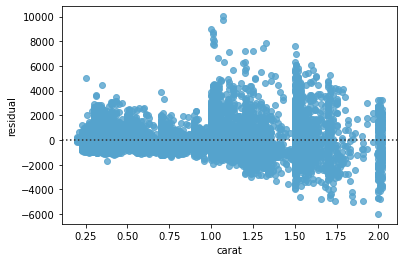

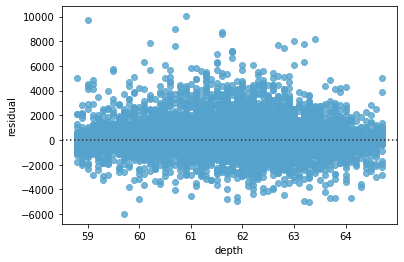

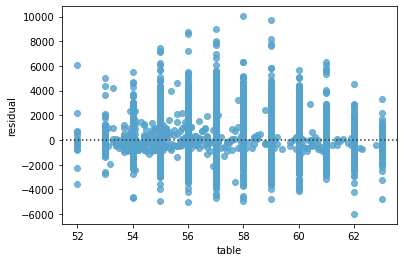

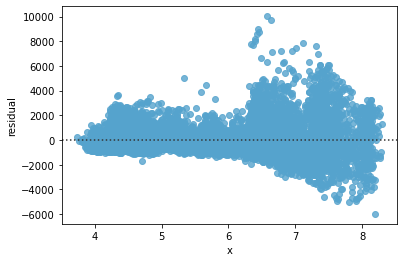

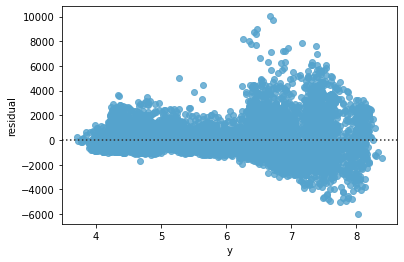

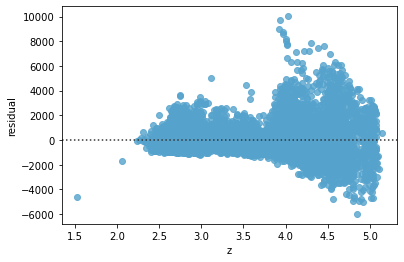

In [114]:
for names in ['carat','depth','table','x','y','z']:
        sns.residplot(x0[names],x0['residual'])
        plt.show()

- We can see here Variable x,y and z are showing the funnel shape, which indicates the Hetroscadecity in Data. So, We will Remove all the variable with Highest Correlation and rebuild the Model. 

#### Check Auto Correlation

In [115]:
stm.stats.stattools.durbin_watson(x0.residual)

2.012686097719211

#### Check Normality

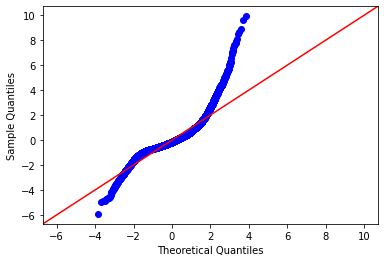

In [116]:
sm.qqplot(x0.residual,fit=True,line='45')
plt.show()

### Model 9

In [117]:
x_train1=x_train.drop('x',axis=1)
y_train1=y_train

x_test1=x_test.drop('x',axis=1)
y_test1=y_test

In [119]:

model1=LR.fit(x_train1,y_train1)

model1_score=model1.score(x_train1,y_train1)
print("R-Value for Model9 = ",model1_score)

train_pred1=model1.predict(x_train1)
test_pred1=model1.predict(x_test1)

rmse_train1=mean_squared_error(y_train1,train_pred1)
rmse_test1=mean_squared_error(y_test1,test_pred1)

print("RMSE for Train Data of Model9 = ",rmse_train1)
print("RMSE for Test Data of Model9 = ",rmse_test1)

print("\n \n Co-efficients of Model9")

model1_coef=pd.DataFrame(np.array(model1.coef_).reshape(1,len(x_train1.columns)),columns=x_train1.columns)
model1_coef.T


R-Value for Model9 =  0.9211792888213821
RMSE for Train Data of Model9 =  1036237.3354222167
RMSE for Test Data of Model9 =  1008770.6684980611

 
 Co-efficients of Model9


,0
carat,14021.093986
depth,1.832034
table,-43.847942
y,-635.821996
z,-2330.071365
cut_Good,412.725541
cut_Ideal,539.619167
cut_Premium,453.061896
cut_Very_Good,468.679757
color_E,-214.668527


In [120]:
x1=x_train1.copy()
x1['y_actual']=y_train1
x1['y_predicted']=train_pred1
x1['residual']=y_train1-train_pred1


#### Check Homoscadecity

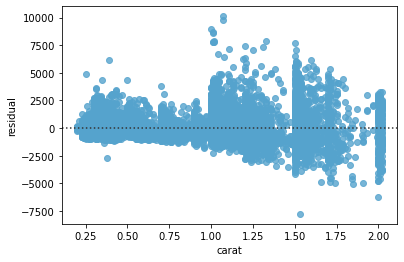

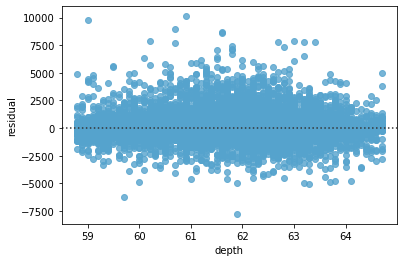

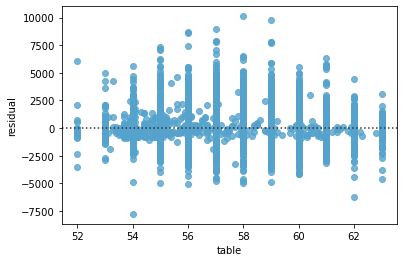

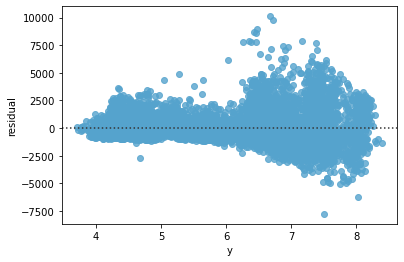

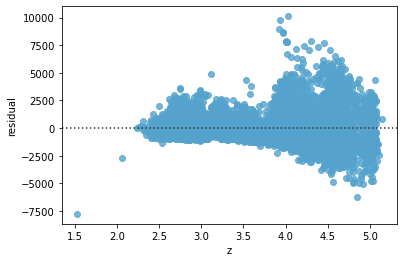

In [121]:
for names in ['carat','depth','table','y','z']:
        sns.residplot(x1[names],x1['residual'])
        plt.show()

- still y and z showing funnel shape. Lets drop these variable along with all the other insignificant variables and rebuild the model. 

#### Check Auto Correlation

In [122]:
stm.stats.stattools.durbin_watson(x1.residual)


2.0107470857742484

#### Check Normality

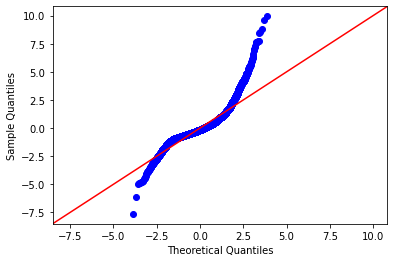

In [123]:
sm.qqplot(x1.residual,fit=True,line='45')
plt.show()

### Model10

In [125]:
x_train2=x_train.drop(['x','y'],axis=1)
y_train2=y_train

x_test2=x_test.drop(['x','y'],axis=1)
y_test2=y_test

In [126]:
model2=LR.fit(x_train2,y_train2)

model2_score=model2.score(x_train2,y_train2)
print("R-Value for Model10 = ",model2_score)

train_pred2=model2.predict(x_train2)
test_pred2=model2.predict(x_test2)

rmse_train2=mean_squared_error(y_train2,train_pred2)
rmse_test2=mean_squared_error(y_test2,test_pred2)

print("RMSE for Train Data of Model10 = ",rmse_train2)
print("RMSE for Test Data of Model10 = ",rmse_test2)

print("\n \n Co-efficients of Model10")
model2_coef=pd.DataFrame(np.array(model2.coef_).reshape(1,len(x_train2.columns)),columns=x_train2.columns)
model2_coef.T


R-Value for Model10 =  0.9210887439634766
RMSE for Train Data of Model10 =  1037427.7073547852
RMSE for Test Data of Model10 =  1003152.0694533023

 
 Co-efficients of Model10


,0
carat,13909.054278
depth,62.424423
table,-42.740923
z,-3284.285002
cut_Good,387.911983
cut_Ideal,524.708493
cut_Premium,452.064223
cut_Very_Good,446.064832
color_E,-213.992019
color_F,-276.639749


### Model11

In [127]:
x_train3=x_train.drop(['x','cut_Ideal','y'],axis=1)
y_train3=y_train

x_test3=x_test.drop(['x','cut_Ideal','y'],axis=1)
y_test3=y_test

In [128]:
model3=LR.fit(x_train3,y_train3)

model3_score=model3.score(x_train3,y_train3)
print("R-Value for Model11 = ",model3_score)


train_pred3=model3.predict(x_train3)
test_pred3=model3.predict(x_test3)

rmse_train3=mean_squared_error(y_train3,train_pred3)
rmse_test3=mean_squared_error(y_test3,test_pred3)

print("RMSE for Train Data of Model11 = ",rmse_train3)
print("RMSE for Test Data of Model11 = ",rmse_test3)

print("\n \n Co-efficients of Model11")
model3_coef=pd.DataFrame(np.array(model3.coef_).reshape(1,len(x_train3.columns)),columns=x_train3.columns)
model3_coef.T


R-Value for Model11 =  0.9209551980548152
RMSE for Train Data of Model11 =  1039183.4039791699
RMSE for Test Data of Model11 =  1004568.3513739498

 
 Co-efficients of Model11


,0
carat,13909.428869
depth,52.749511
table,-47.227349
z,-3286.017748
cut_Good,-105.270352
cut_Premium,-54.848002
cut_Very_Good,-59.657371
color_E,-212.687861
color_F,-277.208524
color_G,-472.839284


### Model12

In [129]:
x_train4=x_train.drop(['x','y','z','cut_Ideal'],axis=1)
y_train4=y_train

x_test4=x_test.drop(['x','y','z','cut_Ideal'],axis=1)
y_test4=y_test


In [130]:
model4=LR.fit(x_train4,y_train4)

model4_score=model4.score(x_train4,y_train4)
print("R-Value for Model12 = ",model4_score)


train_pred4=model4.predict(x_train4)
test_pred4=model4.predict(x_test4)

rmse_train4=mean_squared_error(y_train4,train_pred4)
rmse_test4=mean_squared_error(y_test4,test_pred4)

print("RMSE for Train Data of Model12 = ",rmse_train4)
print("RMSE for Test Data of Model12 = ",rmse_test4)

model4_coef=pd.DataFrame(np.array(model4.coef_),columns=["Model12_coefficient"], index=x_train4.columns)
model4_coef

R-Value for Model12 =  0.9100327765646886
RMSE for Train Data of Model12 =  1182777.90816524
RMSE for Test Data of Model12 =  1183612.416951435


,Model12_coefficient
carat,8938.109054
depth,-41.632802
table,-37.648152
cut_Good,-120.544202
cut_Premium,-19.534615
cut_Very_Good,-52.451737
color_E,-217.699759
color_F,-315.014398
color_G,-510.107145
color_H,-991.415035


### Model13

In [131]:
x_train5=x_train.drop(['x','z','y','clarity_SI1','cut_Ideal'],axis=1)
y_train5=y_train

x_test5=x_test.drop(['x','z','y','clarity_SI1','cut_Ideal'],axis=1)
y_test5=y_test

In [132]:
model5=LR.fit(x_train5,y_train5)

model5_score=model5.score(x_train5,y_train5)
print("R-Value for Model13 = ",model5_score)


train_pred5=model5.predict(x_train5)
test_pred5=model5.predict(x_test5)

rmse_train5=mean_squared_error(y_train5,train_pred5)
rmse_test5=mean_squared_error(y_test5,test_pred5)

print("RMSE for Train Data of Model13 = ",rmse_train5)
print("RMSE for Test Data of Model13 = ",rmse_test5)

model5_coef=pd.DataFrame(np.array(model5.coef_),columns=["Model13_coefficient"], index=x_train5.columns)
model5_coef

R-Value for Model13 =  0.9037827544054324
RMSE for Train Data of Model13 =  1264945.4782339856
RMSE for Test Data of Model13 =  1265162.3238517


,Model13_coefficient
carat,8888.644401
depth,-46.482271
table,-42.556086
cut_Good,-115.910633
cut_Premium,-14.169361
cut_Very_Good,-26.739380
color_E,-232.842584
color_F,-334.064298
color_G,-523.937800
color_H,-1008.611950


### Model14

In [134]:
x_train6=x_train.drop(['x','z','y','clarity_SI1','cut_Ideal','cut_Premium'],axis=1)
y_train6=y_train

x_test6=x_test.drop(['x','z','y','clarity_SI1','cut_Ideal','cut_Premium'],axis=1)
y_test6=y_test


In [135]:
model6=LR.fit(x_train6,y_train6)

model6_score=model6.score(x_train6,y_train6)
print("R-Value for Model14 = ",model6_score)


train_pred6=model6.predict(x_train6)
test_pred6=model6.predict(x_test6)

rmse_train6=mean_squared_error(y_train6,train_pred6)
rmse_test6=mean_squared_error(y_test6,test_pred6)

print("RMSE for Train Data of Model14 = ",rmse_train6)
print("RMSE for Test Data of Model14 = ",rmse_test6)

model6_coef=pd.DataFrame(np.array(model6.coef_),columns=["Model14_coefficient"], index=x_train6.columns)
model6_coef

R-Value for Model14 =  0.9037810725611539
RMSE for Train Data of Model14 =  1264967.589044808
RMSE for Test Data of Model14 =  1265369.0203714573


,Model14_coefficient
carat,8888.382225
depth,-46.607233
table,-44.127299
cut_Good,-108.519724
cut_Very_Good,-19.992969
color_E,-232.913904
color_F,-334.183908
color_G,-524.327984
color_H,-1009.034034
color_I,-1529.341894


### Model15

In [137]:
x_train7=x_train.drop(['x','z','y','clarity_SI1','cut_Ideal','cut_Premium','cut_Very_Good'],axis=1)
y_train7=y_train

x_test7=x_test.drop(['x','z','y','clarity_SI1','cut_Ideal','cut_Premium','cut_Very_Good'],axis=1)
y_test7=y_test


In [138]:
model7=LR.fit(x_train7,y_train7)

model7_score=model7.score(x_train7,y_train7)
print("R-Value for Model15 = ",model7_score)


train_pred7=model7.predict(x_train7)
test_pred7=model7.predict(x_test7)

rmse_train7=mean_squared_error(y_train7,train_pred7)
rmse_test7=mean_squared_error(y_test7,test_pred7)

print("RMSE for Train Data of Model15 = ",rmse_train7)
print("RMSE for Test Data of Model15 = ",rmse_test7)

model7_coef=pd.DataFrame(np.array(model7.coef_),columns=["Model15_coefficient"], index=x_train7.columns)
model7_coef

R-Value for Model15 =  0.9037761714284116
RMSE for Train Data of Model15 =  1265032.0230832421
RMSE for Test Data of Model15 =  1265665.686942207


,Model15_coefficient
carat,8888.392710
depth,-48.171443
table,-45.113475
cut_Good,-100.429269
color_E,-233.325136
color_F,-334.347348
color_G,-524.031389
color_H,-1008.835825
color_I,-1529.348297
color_J,-2266.790736


In [139]:
x7=x_train7.copy()

In [140]:
x7['y_actual']=y_train7
x7['y_predicted']=train_pred7
x7['residual']=y_train7-train_pred7

In [141]:
x7.head()

,carat,depth,table,cut_Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,y_actual,y_predicted,residual
349,0.44,63.1,57.0,1,0,0,0,0,0,1,0,0,1,0,0,0,694,-414.586323,1108.586323
26432,0.72,61.3,59.0,0,0,0,0,0,0,0,0,1,0,0,0,0,2155,2516.746192,-361.746192
21324,0.58,61.2,57.0,0,0,1,0,0,0,0,0,0,1,0,0,0,1979,2954.187055,-975.187055
6064,0.30,63.2,59.0,1,1,0,0,0,0,0,0,0,0,0,0,1,684,747.183150,-63.183150
24384,0.30,61.6,58.0,0,1,0,0,0,0,0,0,0,0,0,0,1,766,969.800203,-203.800203


## Model15 Assumptions

#### Check HomeScadecity

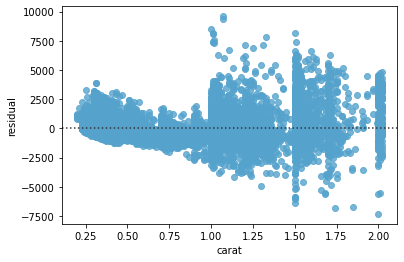

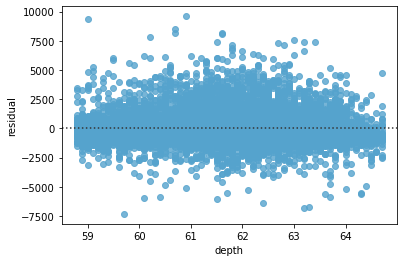

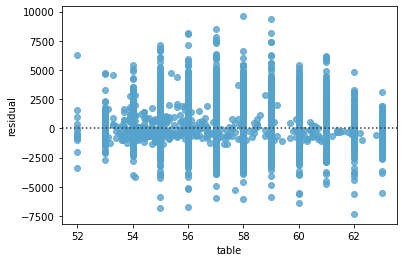

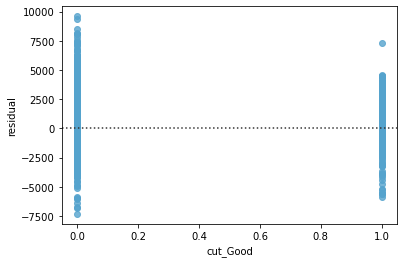

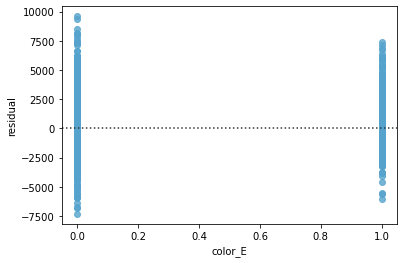

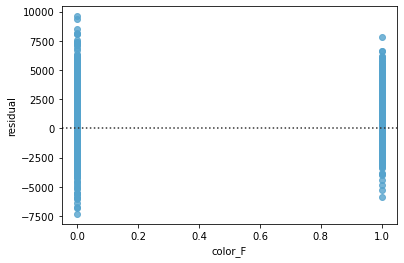

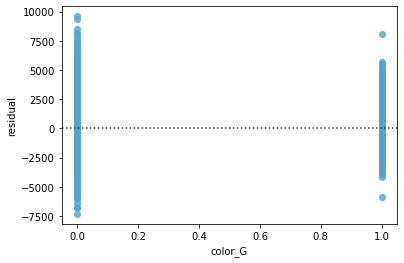

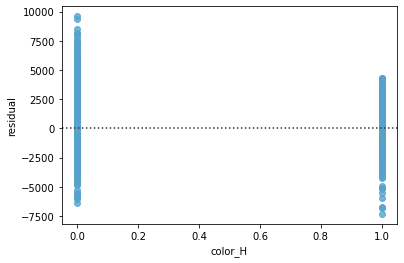

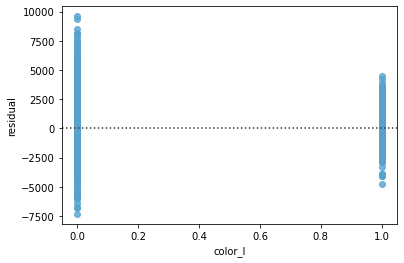

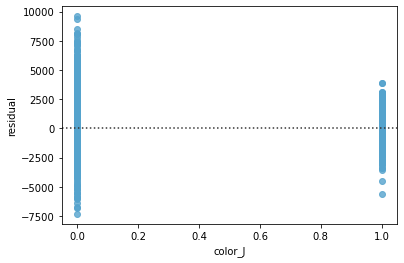

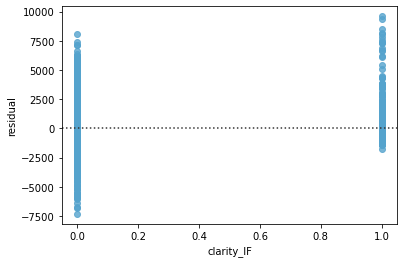

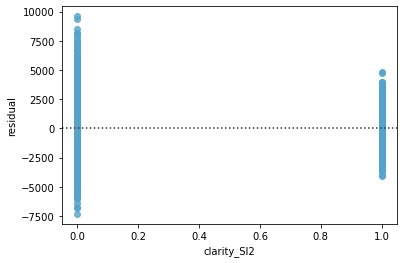

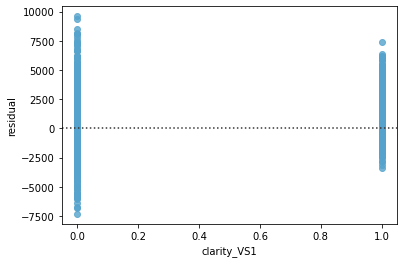

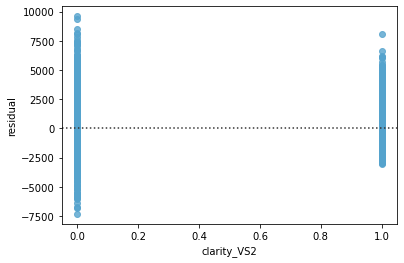

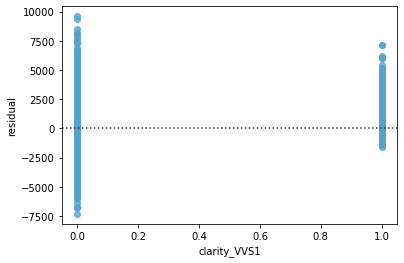

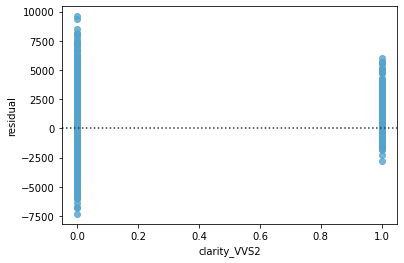

In [142]:
for names in x7.columns:
    if names in ['const','y_actual','y_predicted','residual']:
        pass
    else:
        sns.residplot(x7[names],x7['residual'])
        plt.show()

#### Check Auto Correlation

In [143]:
stm.stats.stattools.durbin_watson(x7.residual)

2.0018308558874387

#### Normal Test for Error Term

In [297]:
import scipy.stats as st
st.shapiro(x7.residual)

(0.8959664106369019, 0.0)

<Figure size 2160x1440 with 0 Axes>

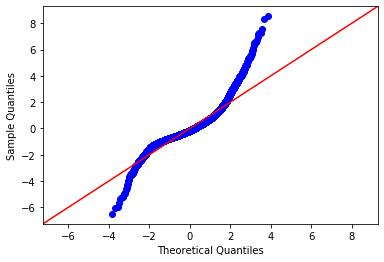

In [298]:
plt.figure(figsize=(30,20))
sm.qqplot(x7.residual,fit=True,line='45')
plt.show()

## Model Compare

In [144]:
dict1={"Model8":[model0_score,rmse_train0,rmse_test0],
      "Model9":[model1_score,rmse_train1,rmse_test1],
      "Model10":[model2_score,rmse_train2,rmse_test2],
      "Model11":[model3_score,rmse_train3,rmse_test3],
      "Model12":[model4_score,rmse_train4,rmse_test4],
      "Model13":[model5_score,rmse_train5,rmse_test5],
      "Model14":[model6_score,rmse_train6,rmse_test6],
      "Model15":[model7_score,rmse_train7,rmse_test7]}
df_sm=pd.DataFrame(dict1,index=["Model Score","RMSE For Train Data", "RMSE For Test Data"])

In [148]:
df_sm

,Model8,Model9,Model10,Model11,Model12,Model13,Model14,Model15
Model Score,9.220534e-01,9.211793e-01,9.210887e-01,9.209552e-01,9.100328e-01,9.037828e-01,9.037811e-01,9.037762e-01
RMSE For Train Data,1.024746e+06,1.036237e+06,1.037428e+06,1.039183e+06,1.182778e+06,1.264945e+06,1.264968e+06,1.265032e+06
RMSE For Test Data,9.998526e+05,1.008771e+06,1.003152e+06,1.004568e+06,1.183612e+06,1.265162e+06,1.265369e+06,1.265666e+06
